In [1]:
import requests
import sqlite3
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 600)

In [2]:
excel_1 = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')

In [3]:
excel_1.sheet_names

['Introduction',
 'Outcomes & Factors Rankings',
 'Outcomes & Factors SubRankings',
 'Ranked Measure Data',
 'Ranked Measure Sources & Years',
 'Additional Measure Data',
 'Addtl Measure Sources & Years']

In [4]:
excel_1.parse('Ranked Measure Sources & Years')

Health Outcomes  \
0                              Focus Area   
1                    Length of life (50%)   
2                   Quality of life (50%)   
3                                     NaN   
4                                     NaN   
5                                     NaN   
6                                     NaN   
7                  Health Behaviors (30%)   
8                             Focus Area    
9                       Tobacco use (10%)   
10                Diet and exercise (10%)   
11                                    NaN   
12                                    NaN   
13                                    NaN   
14              Alcohol and drug use (5%)   
15                                    NaN   
16                   Sexual activity (5%)   
17                                    NaN   
18                                    NaN   
19                    Clinical Care (20%)   
20                            Focus Area    
21                   Access to care (10%)   
22                                    NaN   
23                                    NaN   
24                                    NaN   
25                  Quality of care (10%)   
26                                    NaN   
27                                    NaN   
28                                    NaN   
29  Social and Economic Environment (40%)   
30                             Focus Area   
31                        Education (10%)   
32                                    NaN   
33                       Employment (10%)   
34                           Income (10%)   
35                                    NaN   
36         Family and social support (5%)   
37                                    NaN   
38                  Community safety (5%)   
39                                    NaN   
40                                    NaN   
41                                    NaN   
42                            Focus Area    
43             Air and water quality (5%)   
44                                    NaN   
45               Housing and transit (5%)   
46                                    NaN   
47                                    NaN   
48                                    NaN   
49                                    NaN   

                              Unnamed: 1  \
0                                Measure   
1                        Premature death   
2                    Poor or fair health   
3              Poor physical health days   
4                Poor mental health days   
5                        Low birthweight   
6                                    NaN   
7                                    NaN   
8                                Measure   
9                          Adult smoking   
10                         Adult obesity   
11                Food environment index   
12                   Physical inactivity   
13      Access to exercise opportunities   
14                    Excessive drinking   
15       Alcohol-impaired driving deaths   
16       Sexually transmitted infections   
17                           Teen births   
18                                   NaN   
19                                   NaN   
20                               Measure   
21                            Uninsured    
22               Primary care physicians   
23                              Dentists   
24               Mental health providers   
25            Preventable hospital stays   
26                 Mammography screening   
27                      Flu vaccinations   
28                                   NaN   
29                                   NaN   
30                               Measure   
31                High school graduation   
32                          Some college   
33                          Unemployment   
34                   Children in poverty   
35                     Income inequality   
36  Children in single-parent households   
37                   Social associations   
38            

In [5]:
df = pd.read_csv('analytic_data2019.csv')

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,24

In [6]:
df.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2019                        NaN   
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   

  Premature death raw value Premature death numerator  \
0             v001_rawvalue            v001_numerator   
1               6900.630354                   3745538   
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   

  Premature death denominator Premature death CI low Premature death CI high  \
0            v001_denominator             v001_cilow             v001_cihigh   
1                   908266078           6890.3492059             6910.911502   
2                    13636816           9815.1909454            10019.274852   
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   

  Premature death (Black) Premature death (Hispanic) Premature death (White)  \
0         v001_race_black         v001_race_hispanic         v001_race_white   
1                     NaN                        NaN                     NaN   
2                     NaN                        NaN                     NaN   
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   

  Poor or fair health raw value Poor or fair health numerator  \
0                 v002_rawvalue                v002_numerator   
1                           NaN                           NaN   
2                  0.2140240566                           NaN   
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   

  Poor or fair health denominator Poor or fair health CI low  \
0                v002_denominator                 v002_cilow   
1                             NaN                        NaN   
2                             NaN               0.2009537484   
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   

  Poor or fair health CI high Poor physical health days raw value  \
0                 v002_cihigh                       v036_rawvalue   
1                         NaN                                 NaN   
2                0.2277022217                        4.4004575204   
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   

  Poor physical health days numerator Poor physical health days denominator  \
0                      v036_numerator                      v036_denominator   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

  Poor physical health days CI low Poor physical health days CI high  \
0                       v036_cilow                       v036_cihigh   
1                              NaN                               NaN 

In [7]:
df.tail()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
3190              56               37             56037                 WY   
3191              56               39             56039                 WY   
3192              56               41             56041                 WY   
3193              56               43             56043                 WY   
3194              56               45             56045                 WY   

                   Name Release Year County Ranked (Yes=1/No=0)  \
3190  Sweetwater County         2019                          1   
3191       Teton County         2019                          1   
3192       Uinta County         2019                          1   
3193    Washakie County         2019                          1   
3194      Weston County         2019                          1   

     Premature death raw value Premature death numerator  \
3190                   7497.44                       495   
3191                   3786.13                       124   
3192                    7790.3                       262   
3193                   5504.65                       108   
3194                   4991.17                        82   

     Premature death denominator Premature death CI low  \
3190                      127427                6599.95   
3191                       66351                2819.78   
3192                       59466                6427.29   
3193                       22335                 3712.6   
3194                       19599                3969.62   

     Premature death CI high Premature death (Black)  \
3190                 8394.93                     NaN   
3191                 4752.47                     NaN   
3192                 9153.31                     NaN   
3193                  7296.7                     NaN   
3194                 6195.36                     NaN   

     Premature death (Hispanic) Premature death (White)  \
3190                    6413.22                 7834.05   
3191                        NaN                     NaN   
3192                        NaN                     NaN   
3193                        NaN                     NaN   
3194                        NaN                     NaN   

     Poor or fair health raw value Poor or fair health numerator  \
3190                      0.153772                           NaN   
3191                      0.121817                           NaN   
3192                      0.158858                           NaN   
3193                      0.161261                           NaN   
3194                      0.132375                           NaN   

     Poor or fair health denominator Poor or fair health CI low  \
3190                             NaN                   0.148786   
3191                             NaN                   0.117142   
3192                             NaN                   0.152627   
3193                             NaN                   0.155112   
3194                             NaN                   0.126647   

     Poor or fair health CI high Poor physical health days raw value  \
3190                    0.158688                             3.53656   
3191                    0.126298                             3.16632   
3192                    0.164707                             3.67754   
3193                    0.167209                             3.60169   
3194                    0.137956                             3.44806   

     Poor physical health days numerator  \
3190                                 NaN   
3191                                 NaN   
3192                                 NaN   
3193                                 NaN   
3194                                 NaN   

     Poor physical health days denominator Poor physical health days CI low  \
3190                                   NaN                           3.3884   
3191                                   NaN               

In [8]:
diabetes_2016 = pd.read_csv('DiabetesAtlasCountyData.csv')

In [9]:
diabetes_2016.head()

County    State  CountyFIPS Percentage Lower Limit  Upper Limit
0  Autauga County  Alabama        1001       11.1         7.8         15.5
1  Baldwin County  Alabama        1003       10.7           9         12.6
2  Barbour County  Alabama        1005       17.6        12.3         23.9
3     Bibb County  Alabama        1007       14.5         9.5           21
4   Blount County  Alabama        1009         17        12.7         22.2

In [10]:
diabetes_2016['CountyFIPS'] = diabetes_2016['CountyFIPS'].map(lambda x: str(x).zfill(5))

In [11]:
diabetes_2016.tail()

County    State CountyFIPS Percentage Lower Limit  \
3221  Sweetwater County  Wyoming      56037        8.8         7.1   
3222       Teton County  Wyoming      56039        2.2         1.3   
3223       Uinta County  Wyoming      56041       11.3         8.6   
3224    Washakie County  Wyoming      56043       11.7         8.6   
3225      Weston County  Wyoming      56045          9         6.1   

      Upper Limit  
3221           11  
3222          3.4  
3223         14.2  
3224         15.3  
3225         12.6

In [12]:
median_income_2016 = pd.ExcelFile('est16all.xls')

In [13]:
median_income_2016_df = median_income_2016.parse('est16ALL', skiprows= 3).loc[:, 
                                                                              ['State FIPS Code', 'County FIPS Code', 
                                                                               'Postal Code', 'Name', 'Median Household Income']]

In [14]:
median_income_2016_df.head()

State FIPS Code  County FIPS Code Postal Code            Name  \
0                0                 0          US   United States   
1                1                 0          AL         Alabama   
2                1                 1          AL  Autauga County   
3                1                 3          AL  Baldwin County   
4                1                 5          AL  Barbour County   

  Median Household Income  
0                   57617  
1                   46309  
2                   54487  
3                   56460  
4                   32884

In [15]:
median_income_2016_df['five_digit_FIPS_Code'] = median_income_2016_df['State FIPS Code'].map(lambda x: str(x).zfill(2)) + median_income_2016_df['County FIPS Code'].map(lambda x: str(x).zfill(3))

In [16]:
median_income_2016_df.head()

State FIPS Code  County FIPS Code Postal Code            Name  \
0                0                 0          US   United States   
1                1                 0          AL         Alabama   
2                1                 1          AL  Autauga County   
3                1                 3          AL  Baldwin County   
4                1                 5          AL  Barbour County   

  Median Household Income five_digit_FIPS_Code  
0                   57617                00000  
1                   46309                01000  
2                   54487                01001  
3                   56460                01003  
4                   32884                01005

In [17]:
unemployment_2016 = pd.ExcelFile('laucnty16.xlsx')

In [18]:
unemployment_2016_df = unemployment_2016.parse('laucnty16', skiprows = 4)

In [19]:
unemployment_2016_df = unemployment_2016_df[1:len(unemployment_2016_df)-3]

In [20]:
unemployment_2016_df.head()

Code  Code.1  Code.2 County Name/State Abbreviation    Year  \
1  CN0100100000000     1.0     1.0             Autauga County, AL  2016.0   
2  CN0100300000000     1.0     3.0             Baldwin County, AL  2016.0   
3  CN0100500000000     1.0     5.0             Barbour County, AL  2016.0   
4  CN0100700000000     1.0     7.0                Bibb County, AL  2016.0   
5  CN0100900000000     1.0     9.0              Blount County, AL  2016.0   

   Unnamed: 5    Force  Employed  Unemployed  (%)  
1         NaN  25966.0   24645.0      1321.0  5.1  
2         NaN  90670.0   85839.0      4831.0  5.3  
3         NaN   8417.0    7717.0       700.0  8.3  
4         NaN   8623.0    8067.0       556.0  6.4  
5         NaN  24623.0   23298.0      1325.0  5.4

In [21]:
for col, length in {'Code.1': 2, 'Code.2': 3}.items():
    unemployment_2016_df[col] = unemployment_2016_df[col].map(lambda x: str(int(x)).zfill(length))

In [22]:
unemployment_2016_df

Code Code.1 Code.2 County Name/State Abbreviation    Year  \
1     CN0100100000000     01    001             Autauga County, AL  2016.0   
2     CN0100300000000     01    003             Baldwin County, AL  2016.0   
3     CN0100500000000     01    005             Barbour County, AL  2016.0   
4     CN0100700000000     01    007                Bibb County, AL  2016.0   
5     CN0100900000000     01    009              Blount County, AL  2016.0   
...               ...    ...    ...                            ...     ...   
3215  CN7214500000000     72    145        Vega Baja Municipio, PR  2016.0   
3216  CN7214700000000     72    147          Vieques Municipio, PR  2016.0   
3217  CN7214900000000     72    149         Villalba Municipio, PR  2016.0   
3218  CN7215100000000     72    151          Yabucoa Municipio, PR  2016.0   
3219  CN7215300000000     72    153            Yauco Municipio, PR  2016.0   

      Unnamed: 5    Force  Employed  Unemployed   (%)  
1            NaN  25966.0   24645.0      1321.0   5.1  
2            NaN  90670.0   85839.0      4831.0   5.3  
3            NaN   8417.0    7717.0       700.0   8.3  
4            NaN   8623.0    8067.0       556.0   6.4  
5            NaN  24623.0   23298.0      1325.0   5.4  
...          ...      ...       ...         ...   ...  
3215         NaN  13722.0   11821.0      1901.0  13.9  
3216         NaN   3257.0    2912.0       345.0  10.6  
3217         NaN   7808.0    6231.0      1577.0  20.2  
3218         NaN   9073.0    7540.0      1533.0  16.9  
3219         NaN  10726.0    8713.0      2013.0  18.8  

[3219 rows x 10 columns]

In [23]:
unemployment_2016_df['five_digit_FIPS_Code'] = unemployment_2016_df['Code.1'] + unemployment_2016_df['Code.2']

In [24]:
unemployment_2016_df.head()

Code Code.1 Code.2 County Name/State Abbreviation    Year  \
1  CN0100100000000     01    001             Autauga County, AL  2016.0   
2  CN0100300000000     01    003             Baldwin County, AL  2016.0   
3  CN0100500000000     01    005             Barbour County, AL  2016.0   
4  CN0100700000000     01    007                Bibb County, AL  2016.0   
5  CN0100900000000     01    009              Blount County, AL  2016.0   

   Unnamed: 5    Force  Employed  Unemployed  (%) five_digit_FIPS_Code  
1         NaN  25966.0   24645.0      1321.0  5.1                01001  
2         NaN  90670.0   85839.0      4831.0  5.3                01003  
3         NaN   8417.0    7717.0       700.0  8.3                01005  
4         NaN   8623.0    8067.0       556.0  6.4                01007  
5         NaN  24623.0   23298.0      1325.0  5.4                01009

In [25]:
df.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2019                        NaN   
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   

  Premature death raw value Premature death numerator  \
0             v001_rawvalue            v001_numerator   
1               6900.630354                   3745538   
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   

  Premature death denominator Premature death CI low Premature death CI high  \
0            v001_denominator             v001_cilow             v001_cihigh   
1                   908266078           6890.3492059             6910.911502   
2                    13636816           9815.1909454            10019.274852   
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   

  Premature death (Black) Premature death (Hispanic) Premature death (White)  \
0         v001_race_black         v001_race_hispanic         v001_race_white   
1                     NaN                        NaN                     NaN   
2                     NaN                        NaN                     NaN   
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   

  Poor or fair health raw value Poor or fair health numerator  \
0                 v002_rawvalue                v002_numerator   
1                           NaN                           NaN   
2                  0.2140240566                           NaN   
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   

  Poor or fair health denominator Poor or fair health CI low  \
0                v002_denominator                 v002_cilow   
1                             NaN                        NaN   
2                             NaN               0.2009537484   
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   

  Poor or fair health CI high Poor physical health days raw value  \
0                 v002_cihigh                       v036_rawvalue   
1                         NaN                                 NaN   
2                0.2277022217                        4.4004575204   
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   

  Poor physical health days numerator Poor physical health days denominator  \
0                      v036_numerator                      v036_denominator   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

  Poor physical health days CI low Poor physical health days CI high  \
0                       v036_cilow                       v036_cihigh   
1                              NaN                               NaN 

In [26]:
df_diabetes = df.loc[:, ["State FIPS Code", 
"County FIPS Code", 
"5-digit FIPS Code", 
"State Abbreviation", 
"Name",
"Poor or fair health raw value",
"Poor physical health days raw value",
"Poor mental health days raw value",
"Adult smoking raw value",
"Adult obesity raw value",
"Food environment index raw value",
"Physical inactivity raw value",
"Access to exercise opportunities raw value",
"Excessive drinking raw value",
"Uninsured raw value",
"Primary care physicians raw value",
"Dentists raw value",
"Mental health providers raw value",
"Some college raw value",
"Unemployment raw value",
"Children in poverty raw value",
"Income inequality raw value",
"Children in single-parent households raw value",
"Social associations raw value",
"Air pollution - particulate matter raw value",
"Severe housing problems raw value",
"Long commute - driving alone raw value",
"Life expectancy raw value",
"Food insecurity raw value",
"Limited access to healthy foods raw value",
"Insufficient sleep raw value",
"Uninsured adults raw value",
"Median household income raw value",
"Children eligible for free or reduced price lunch raw value",
"Residential segregation - non-white/white raw value",
"Severe housing cost burden raw value",
"% below 18 years of age raw value",
"% 65 and older raw value",
"% Rural raw value",
"Diabetes prevalence raw value"]]

In [27]:
df_diabetes.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Poor or fair health raw value  \
0          county                 v002_rawvalue   
1   United States                           NaN   
2         Alabama                  0.2140240566   
3  Autauga County                  0.1841112436   
4  Baldwin County                  0.1806045782   

  Poor physical health days raw value Poor mental health days raw value  \
0                       v036_rawvalue                     v042_rawvalue   
1                                 NaN                               NaN   
2                        4.4004575204                       4.577366748   
3                        4.2005779826                      4.3067392835   
4                        4.0987477691                      4.2496487805   

  Adult smoking raw value Adult obesity raw value  \
0           v009_rawvalue           v011_rawvalue   
1                     NaN                   0.285   
2             0.215381544                   0.351   
3             0.191246585                   0.375   
4            0.1679548515                    0.31   

  Food environment index raw value Physical inactivity raw value  \
0                    v133_rawvalue                 v070_rawvalue   
1                              7.7                         0.222   
2                              5.8                         0.282   
3                              7.2                         0.311   
4                                8                         0.238   

  Access to exercise opportunities raw value Excessive drinking raw value  \
0                              v132_rawvalue                v049_rawvalue   
1                               0.8389448174                          NaN   
2                               0.6164961831                 0.1417814586   
3                                0.686775027                 0.1687801512   
4                               0.7197103119                 0.1671496869   

  Uninsured raw value Primary care physicians raw value Dentists raw value  \
0       v085_rawvalue                     v004_rawvalue      v088_rawvalue   
1        0.1000885875                       0.000754309       0.0006843073   
2         0.107717996                       0.000653877       0.0004761273   
3         0.085009665                      0.0004150426        0.000324301   
4        0.1069928804                      0.0007287966       0.0004985232   

  Mental health providers raw value Some college raw value  \
0                     v062_rawvalue          v069_rawvalue   
1                      0.0022868902           0.6522563975   
2                      0.0009050726           0.5986474992   
3                      0.0001621505           0.6085466499   
4                      0.0009123916           0.6613392634   

  Unemployment raw value Children in poverty raw value  \
0          v023_rawvalue                 v024_rawvalue   
1           0.0435556876                         0.184   
2           0.0439678517                         0.244   
3           0.0386352233                         0.193   
4           0.0398833641                         0.147   

  Income inequality raw value Children in single-parent households raw value  \
0               v044_rawvalue                                  v082_rawvalue   
1                4.9414857531                                   0.3325168477   
2                 5.238579235                                   0.3810461622   
3                4.6366638778                                   0.2470009686   
4          

In [28]:
df_diabetes = df_diabetes.rename(columns = {"State FIPS Code" : "state_code", 
"County FIPS Code" : "county_code" , 
"5-digit FIPS Code" : "FIPS_code", 
"State Abbreviation" : "state_abr", 
"Name" : "county_name",
"Poor or fair health raw value" : "poor_fair_health",
"Poor physical health days raw value" : "poor_health_days",
"Poor mental health days raw value" : "poor_mental_health_days",
"Adult smoking raw value" : "adult_smoking",
"Adult obesity raw value" : "adult_obesity",
"Food environment index raw value" : "food_environ_index",
"Physical inactivity raw value" : "physical_inactivity",
"Access to exercise opportunities raw value" : "access_to_exercise",
"Excessive drinking raw value" : "excessive_drinking",
"Uninsured raw value" : "uninsured",
"Primary care physicians raw value" : "primary_care",
"Dentists raw value" : "dentists",
"Mental health providers raw value" : "mental_care",
"Some college raw value" : "some_college",
"Unemployment raw value" : "unemployment",
"Children in poverty raw value" : "children_in_poverty",
"Income inequality raw value" : "income_in_equality",
"Children in single-parent households raw value" : "single_parent_children",
"Social associations raw value" : "social_associations",
"Air pollution - particulate matter raw value" : "air_pollution",
"Severe housing problems raw value" : "severe_housing",
"Long commute - driving alone raw value" : "long_commute",
"Life expectancy raw value" : "life_expectancy",
"Food insecurity raw value" : "food_insecurity",
"Limited access to healthy foods raw value" : "limited_access_heatlh_food",
"Insufficient sleep raw value" : "insufficient_sleep",
"Uninsured adults raw value" : "uninsured_adults",
"Median household income raw value" : "med_hh_Income",
"Children eligible for free or reduced price lunch raw value" : "children_free_lunch",
"Residential segregation - non-white/white raw value" : "residential_segregation",
"Severe housing cost burden raw value" : "severe_housing_cost",
"% below 18 years of age raw value" : "under_18",
"% 65 and older raw value" : "over_65",
"% Rural raw value" : "rural",
"Diabetes prevalence raw value" : "diabetes_target"})

In [29]:
df_diabetes = df_diabetes[1:]

In [30]:
df_diabetes['FIPS_code'] = df_diabetes['FIPS_code'].map(lambda x: str(x))

In [31]:
diabetes_2016['CountyFIPS'] = diabetes_2016['CountyFIPS'].map(lambda x: str(x))

In [32]:
df_diabetes = df_diabetes.merge(diabetes_2016[['CountyFIPS', 'Percentage']], how = 'left', left_on = 'FIPS_code', right_on = 'CountyFIPS')

In [33]:
median_income_2016_df.five_digit_FIPS_Code = median_income_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))

In [34]:
df_diabetes = df_diabetes.merge(median_income_2016_df[['five_digit_FIPS_Code', 'Median Household Income']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')

In [35]:
df_diabetes.head()

state_code county_code FIPS_code state_abr     county_name poor_fair_health  \
0         00         000     00000        US   United States              NaN   
1         01         000     01000        AL         Alabama     0.2140240566   
2         01         001     01001        AL  Autauga County     0.1841112436   
3         01         003     01003        AL  Baldwin County     0.1806045782   
4         01         005     01005        AL  Barbour County     0.2577341563   

  poor_health_days poor_mental_health_days adult_smoking adult_obesity  \
0              NaN                     NaN           NaN         0.285   
1     4.4004575204             4.577366748   0.215381544         0.351   
2     4.2005779826            4.3067392835   0.191246585         0.375   
3     4.0987477691            4.2496487805  0.1679548515          0.31   
4     5.0674383044             4.634994147  0.2154087757         0.443   

  food_environ_index physical_inactivity access_to_exercise  \
0                7.7               0.222       0.8389448174   
1                5.8               0.282       0.6164961831   
2                7.2               0.311        0.686775027   
3                  8               0.238       0.7197103119   
4                5.6               0.282       0.5362566923   

  excessive_drinking     uninsured  primary_care      dentists   mental_care  \
0                NaN  0.1000885875   0.000754309  0.0006843073  0.0022868902   
1       0.1417814586   0.107717996   0.000653877  0.0004761273  0.0009050726   
2       0.1687801512   0.085009665  0.0004150426   0.000324301  0.0001621505   
3       0.1671496869  0.1069928804  0.0007287966  0.0004985232  0.0009123916   
4       0.1269871542  0.1251319664  0.0003851338  0.0003561535  0.0000791452   

   some_college  unemployment children_in_poverty income_in_equality  \
0  0.6522563975  0.0435556876               0.184       4.9414857531   
1  0.5986474992  0.0439678517               0.244        5.238579235   
2  0.6085466499  0.0386352233               0.193       4.6366638778   
3  0.6613392634  0.0398833641               0.147       4.5185596041   
4  0.3677400805  0.0590092278               0.503       5.7550626063   

  single_parent_children social_associations air_pollution severe_housing  \
0           0.3325168477        9.3003532014           NaN   0.1837308951   
1           0.3810461622        12.242715851            11   0.1491215019   
2           0.2470009686        12.631730908          11.7   0.1495464575   
3           0.2518409096        10.692212904          10.3   0.1383172525   
4           0.5721574344        8.4729443482          11.5   0.1545553145   

  long_commute life_expectancy food_insecurity limited_access_heatlh_food  \
0        0.352    79.063850411           0.129               0.0590124246   
1        0.337     75.41303499           0.165               0.0792142495   
2        0.383    76.330589011           0.134                 0.11991125   
3        0.405    78.599497656           0.123                0.054244266   
4        0.338     75.77945737           0.232               0.1073966657   

  insufficient_sleep uninsured_adults med_hh_Income children_free_lunch  \
0                NaN     0.1208028915         60336        0.5196293055   
1       0.3772095459     0.1384998828         48193        0.5174145318   
2       0.3590540606     0.1096110384         58343        0.4793166434   
3       0.3330586814     0.1357031075         56607        0.4507913116   
4       0.3856316713     0.1654223969         32490        0.7376980817   

  residential_segregation severe_housing_cost      under_18       over_65  \
0                     NaN        0.1512417878  0.2261315359  0.1561427218   
1            51.161473293        0.1291760781  0.2247240729  0.1648846597   
2             27.14756927        0.1264520575  0.2393701355  0.1511963102   
3            33.240059197        0.1279592201  0.2184848656  0.1994704366   
4             2

In [36]:
unemployment_2016_df.five_digit_FIPS_Code = unemployment_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))

In [37]:
df_diabetes = df_diabetes.merge(unemployment_2016_df[['five_digit_FIPS_Code', '(%)']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')

In [38]:
df_diabetes.head()

state_code county_code FIPS_code state_abr     county_name poor_fair_health  \
0         00         000     00000        US   United States              NaN   
1         01         000     01000        AL         Alabama     0.2140240566   
2         01         001     01001        AL  Autauga County     0.1841112436   
3         01         003     01003        AL  Baldwin County     0.1806045782   
4         01         005     01005        AL  Barbour County     0.2577341563   

  poor_health_days poor_mental_health_days adult_smoking adult_obesity  \
0              NaN                     NaN           NaN         0.285   
1     4.4004575204             4.577366748   0.215381544         0.351   
2     4.2005779826            4.3067392835   0.191246585         0.375   
3     4.0987477691            4.2496487805  0.1679548515          0.31   
4     5.0674383044             4.634994147  0.2154087757         0.443   

  food_environ_index physical_inactivity access_to_exercise  \
0                7.7               0.222       0.8389448174   
1                5.8               0.282       0.6164961831   
2                7.2               0.311        0.686775027   
3                  8               0.238       0.7197103119   
4                5.6               0.282       0.5362566923   

  excessive_drinking     uninsured  primary_care      dentists   mental_care  \
0                NaN  0.1000885875   0.000754309  0.0006843073  0.0022868902   
1       0.1417814586   0.107717996   0.000653877  0.0004761273  0.0009050726   
2       0.1687801512   0.085009665  0.0004150426   0.000324301  0.0001621505   
3       0.1671496869  0.1069928804  0.0007287966  0.0004985232  0.0009123916   
4       0.1269871542  0.1251319664  0.0003851338  0.0003561535  0.0000791452   

   some_college  unemployment children_in_poverty income_in_equality  \
0  0.6522563975  0.0435556876               0.184       4.9414857531   
1  0.5986474992  0.0439678517               0.244        5.238579235   
2  0.6085466499  0.0386352233               0.193       4.6366638778   
3  0.6613392634  0.0398833641               0.147       4.5185596041   
4  0.3677400805  0.0590092278               0.503       5.7550626063   

  single_parent_children social_associations air_pollution severe_housing  \
0           0.3325168477        9.3003532014           NaN   0.1837308951   
1           0.3810461622        12.242715851            11   0.1491215019   
2           0.2470009686        12.631730908          11.7   0.1495464575   
3           0.2518409096        10.692212904          10.3   0.1383172525   
4           0.5721574344        8.4729443482          11.5   0.1545553145   

  long_commute life_expectancy food_insecurity limited_access_heatlh_food  \
0        0.352    79.063850411           0.129               0.0590124246   
1        0.337     75.41303499           0.165               0.0792142495   
2        0.383    76.330589011           0.134                 0.11991125   
3        0.405    78.599497656           0.123                0.054244266   
4        0.338     75.77945737           0.232               0.1073966657   

  insufficient_sleep uninsured_adults med_hh_Income children_free_lunch  \
0                NaN     0.1208028915         60336        0.5196293055   
1       0.3772095459     0.1384998828         48193        0.5174145318   
2       0.3590540606     0.1096110384         58343        0.4793166434   
3       0.3330586814     0.1357031075         56607        0.4507913116   
4       0.3856316713     0.1654223969         32490        0.7376980817   

  residential_segregation severe_housing_cost      under_18       over_65  \
0                     NaN        0.1512417878  0.2261315359  0.1561427218   
1            51.161473293        0.1291760781  0.2247240729  0.1648846597   
2             27.14756927        0.1264520575  0.2393701355  0.1511963102   
3            33.240059197        0.1279592201  0.2184848656  0.1994704366   
4             2

In [39]:
df_diabetes.county_code = df_diabetes['county_code'].map(lambda x: str(x))

In [40]:
df_diabetes = df_diabetes.drop(['CountyFIPS', 'five_digit_FIPS_Code_x', 'five_digit_FIPS_Code_y'], axis = 1)

In [41]:
df_diabetes = df_diabetes.drop(['diabetes_target', 'med_hh_Income', 'unemployment'], axis = 1)

In [42]:
df_diabetes = df_diabetes.rename(columns = {'Percentage': 'diabetes_target',
                              'Median Household Income': 'med_hh_Income',
                             '(%)': 'unemployment'})

In [43]:
df_diabetes.head()

state_code county_code FIPS_code state_abr     county_name poor_fair_health  \
0         00         000     00000        US   United States              NaN   
1         01         000     01000        AL         Alabama     0.2140240566   
2         01         001     01001        AL  Autauga County     0.1841112436   
3         01         003     01003        AL  Baldwin County     0.1806045782   
4         01         005     01005        AL  Barbour County     0.2577341563   

  poor_health_days poor_mental_health_days adult_smoking adult_obesity  \
0              NaN                     NaN           NaN         0.285   
1     4.4004575204             4.577366748   0.215381544         0.351   
2     4.2005779826            4.3067392835   0.191246585         0.375   
3     4.0987477691            4.2496487805  0.1679548515          0.31   
4     5.0674383044             4.634994147  0.2154087757         0.443   

  food_environ_index physical_inactivity access_to_exercise  \
0                7.7               0.222       0.8389448174   
1                5.8               0.282       0.6164961831   
2                7.2               0.311        0.686775027   
3                  8               0.238       0.7197103119   
4                5.6               0.282       0.5362566923   

  excessive_drinking     uninsured  primary_care      dentists   mental_care  \
0                NaN  0.1000885875   0.000754309  0.0006843073  0.0022868902   
1       0.1417814586   0.107717996   0.000653877  0.0004761273  0.0009050726   
2       0.1687801512   0.085009665  0.0004150426   0.000324301  0.0001621505   
3       0.1671496869  0.1069928804  0.0007287966  0.0004985232  0.0009123916   
4       0.1269871542  0.1251319664  0.0003851338  0.0003561535  0.0000791452   

   some_college children_in_poverty income_in_equality single_parent_children  \
0  0.6522563975               0.184       4.9414857531           0.3325168477   
1  0.5986474992               0.244        5.238579235           0.3810461622   
2  0.6085466499               0.193       4.6366638778           0.2470009686   
3  0.6613392634               0.147       4.5185596041           0.2518409096   
4  0.3677400805               0.503       5.7550626063           0.5721574344   

  social_associations air_pollution severe_housing long_commute  \
0        9.3003532014           NaN   0.1837308951        0.352   
1        12.242715851            11   0.1491215019        0.337   
2        12.631730908          11.7   0.1495464575        0.383   
3        10.692212904          10.3   0.1383172525        0.405   
4        8.4729443482          11.5   0.1545553145        0.338   

  life_expectancy food_insecurity limited_access_heatlh_food  \
0    79.063850411           0.129               0.0590124246   
1     75.41303499           0.165               0.0792142495   
2    76.330589011           0.134                 0.11991125   
3    78.599497656           0.123                0.054244266   
4     75.77945737           0.232               0.1073966657   

  insufficient_sleep uninsured_adults children_free_lunch  \
0                NaN     0.1208028915        0.5196293055   
1       0.3772095459     0.1384998828        0.5174145318   
2       0.3590540606     0.1096110384        0.4793166434   
3       0.3330586814     0.1357031075        0.4507913116   
4       0.3856316713     0.1654223969        0.7376980817   

  residential_segregation severe_housing_cost      under_18       over_65  \
0                     NaN        0.1512417878  0.2261315359  0.1561427218   
1            51.161473293        0.1291760781  0.2247240729  0.1648846597   
2             27.14756927        0.1264520575  0.2393701355  0.1511963102   
3            33.240059197        0.1279592201  0.2184848656  0.1994704366   
4             24.31376525        0.1358676522  0.2076375148  0.1882469331   

          rural diabetes_target med_hh_Income  unemployment  
0           NaN             NaN         576

In [44]:
for col in ['social_associations', 'residential_segregation', 'diabetes_target', 'unemployment']:
    df_diabetes[col] = df_diabetes[col].map(lambda x: float(x)/100)

In [45]:
df_diabetes

state_code county_code FIPS_code state_abr        county_name  \
0            00         000     00000        US      United States   
1            01         000     01000        AL            Alabama   
2            01         001     01001        AL     Autauga County   
3            01         003     01003        AL     Baldwin County   
4            01         005     01005        AL     Barbour County   
...         ...         ...       ...       ...                ...   
3189         56          37     56037        WY  Sweetwater County   
3190         56          39     56039        WY       Teton County   
3191         56          41     56041        WY       Uinta County   
3192         56          43     56043        WY    Washakie County   
3193         56          45     56045        WY      Weston County   

     poor_fair_health poor_health_days poor_mental_health_days adult_smoking  \
0                 NaN              NaN                     NaN           NaN   
1        0.2140240566     4.4004575204             4.577366748   0.215381544   
2        0.1841112436     4.2005779826            4.3067392835   0.191246585   
3        0.1806045782     4.0987477691            4.2496487805  0.1679548515   
4        0.2577341563     5.0674383044             4.634994147  0.2154087757   
...               ...              ...                     ...           ...   
3189         0.153772          3.53656                 3.54355      0.175669   
3190         0.121817          3.16632                 3.07225      0.141373   
3191         0.158858          3.67754                 3.69992      0.181806   
3192         0.161261          3.60169                 3.47969      0.156076   
3193         0.132375          3.44806                 3.41872      0.171381   

     adult_obesity food_environ_index physical_inactivity access_to_exercise  \
0            0.285                7.7               0.222       0.8389448174   
1            0.351                5.8               0.282       0.6164961831   
2            0.375                7.2               0.311        0.686775027   
3             0.31                  8               0.238       0.7197103119   
4            0.443                5.6               0.282       0.5362566923   
...            ...                ...                 ...                ...   
3189         0.302                7.7               0.256           0.901452   
3190         0.136                8.3                0.12           0.997182   
3191         0.318                7.3               0.235           0.813003   
3192         0.297                8.2                0.26           0.818352   
3193         0.309                7.9               0.225           0.271504   

     excessive_drinking     uninsured  primary_care      dentists  \
0                   NaN  0.1000885875   0.000754309  0.0006843073   
1          0.1417814586   0.107717996   0.000653877  0.0004761273   
2          0.1687801512   0.085009665  0.0004150426   0.000324301   
3          0.1671496869  0.1069928804  0.0007287966  0.0004985232   
4          0.1269871542  0.1251319664  0.0003851338  0.0003561535   
...                 ...           ...           ...           ...   
3189           0.203251      0.127509   0.000339636   0.000528323   
3190           0.204511      0.149793    0.00120736    0.00085966   
3191           0.160586       0.12569   0.000385115   0.000829471   
3192            0.16343      0.167082   0.000485732   0.000744048   
3193            0.17857      0.143522   0.000414594   0.000721813   

       mental_care  some_college children_in_poverty income_in_equality  \
0     0.0022868902  0.6522563975               0.184       4.9414857531   
1     0.0009050726  0.5986474992               0.244        5.238579235   
2     0.0001621505  0.6085466499               0.193       4.6366638778   
3     0.0009123916  0.6613392634               0.147       4.5185596041   
4     0.0000791452  0.3677400805      

cleaning time

In [46]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3193
Data columns (total 40 columns):
state_code                    3194 non-null object
county_code                   3194 non-null object
FIPS_code                     3194 non-null object
state_abr                     3194 non-null object
county_name                   3194 non-null object
poor_fair_health              3193 non-null object
poor_health_days              3193 non-null object
poor_mental_health_days       3193 non-null object
adult_smoking                 3193 non-null object
adult_obesity                 3194 non-null object
food_environ_index            3175 non-null object
physical_inactivity           3194 non-null object
access_to_exercise            3188 non-null object
excessive_drinking            3193 non-null object
uninsured                     3193 non-null object
primary_care                  3059 non-null object
dentists                      3109 non-null object
mental_care               

In [47]:
df_diabetes_2 = df_diabetes.copy()

In [48]:
df_diabetes_2.head()

state_code county_code FIPS_code state_abr     county_name poor_fair_health  \
0         00         000     00000        US   United States              NaN   
1         01         000     01000        AL         Alabama     0.2140240566   
2         01         001     01001        AL  Autauga County     0.1841112436   
3         01         003     01003        AL  Baldwin County     0.1806045782   
4         01         005     01005        AL  Barbour County     0.2577341563   

  poor_health_days poor_mental_health_days adult_smoking adult_obesity  \
0              NaN                     NaN           NaN         0.285   
1     4.4004575204             4.577366748   0.215381544         0.351   
2     4.2005779826            4.3067392835   0.191246585         0.375   
3     4.0987477691            4.2496487805  0.1679548515          0.31   
4     5.0674383044             4.634994147  0.2154087757         0.443   

  food_environ_index physical_inactivity access_to_exercise  \
0                7.7               0.222       0.8389448174   
1                5.8               0.282       0.6164961831   
2                7.2               0.311        0.686775027   
3                  8               0.238       0.7197103119   
4                5.6               0.282       0.5362566923   

  excessive_drinking     uninsured  primary_care      dentists   mental_care  \
0                NaN  0.1000885875   0.000754309  0.0006843073  0.0022868902   
1       0.1417814586   0.107717996   0.000653877  0.0004761273  0.0009050726   
2       0.1687801512   0.085009665  0.0004150426   0.000324301  0.0001621505   
3       0.1671496869  0.1069928804  0.0007287966  0.0004985232  0.0009123916   
4       0.1269871542  0.1251319664  0.0003851338  0.0003561535  0.0000791452   

   some_college children_in_poverty income_in_equality single_parent_children  \
0  0.6522563975               0.184       4.9414857531           0.3325168477   
1  0.5986474992               0.244        5.238579235           0.3810461622   
2  0.6085466499               0.193       4.6366638778           0.2470009686   
3  0.6613392634               0.147       4.5185596041           0.2518409096   
4  0.3677400805               0.503       5.7550626063           0.5721574344   

   social_associations air_pollution severe_housing long_commute  \
0             0.093004           NaN   0.1837308951        0.352   
1             0.122427            11   0.1491215019        0.337   
2             0.126317          11.7   0.1495464575        0.383   
3             0.106922          10.3   0.1383172525        0.405   
4             0.084729          11.5   0.1545553145        0.338   

  life_expectancy food_insecurity limited_access_heatlh_food  \
0    79.063850411           0.129               0.0590124246   
1     75.41303499           0.165               0.0792142495   
2    76.330589011           0.134                 0.11991125   
3    78.599497656           0.123                0.054244266   
4     75.77945737           0.232               0.1073966657   

  insufficient_sleep uninsured_adults children_free_lunch  \
0                NaN     0.1208028915        0.5196293055   
1       0.3772095459     0.1384998828        0.5174145318   
2       0.3590540606     0.1096110384        0.4793166434   
3       0.3330586814     0.1357031075        0.4507913116   
4       0.3856316713     0.1654223969        0.7376980817   

   residential_segregation severe_housing_cost      under_18       over_65  \
0                      NaN        0.1512417878  0.2261315359  0.1561427218   
1                 0.511615        0.1291760781  0.2247240729  0.1648846597   
2                 0.271476        0.1264520575  0.2393701355  0.1511963102   
3                 0.332401        0.1279592201  0.2184848656  0.1994704366   
4                 0.243138        0.1358676522  0.2076375148  0.1882469331   

          rural  diabetes_target med_hh_Income  unemployment  
0           NaN              N

In [49]:
for k, v in {'state_code': 'str', 
                    'county_code': 'str', 
                    'FIPS_code': 'str', 
                    'state_abr': 'str', 
                    'county_name': 'str',
                    'poor_fair_health': 'float', 
                    'poor_health_days': 'float', 
                    'poor_mental_health_days': 'float',
                    'adult_smoking': 'float', 
                    'adult_obesity': 'float', 
                    'food_environ_index': 'float',
                    'physical_inactivity': 'float', 
                    'access_to_exercise': 'float', 
                    'excessive_drinking': 'float',
                    'uninsured': 'float', 
                    'primary_care': 'float', 
                    'dentists': 'float', 
                    'mental_care': 'float', 
                    'some_college': 'float',
                    'children_in_poverty': 'float', 
                    'income_in_equality': 'float', 
                    'single_parent_children': 'float',
                    
                    'air_pollution': 'float', 
                    'severe_housing': 'float',
                    'long_commute': 'float', 
                    'life_expectancy': 'float', 
                    'food_insecurity': 'float',
                    'limited_access_heatlh_food': 'float', 
                    'insufficient_sleep': 'float', 
                    'uninsured_adults': 'float',
                    'children_free_lunch': 'float', 
                    
                    'severe_housing_cost': 'float',
                    'under_18': 'float', 
                    'over_65': 'float', 
                    'rural': 'float', 
                    
                    'med_hh_Income': 'float'}.items():
    
    if v == 'str':
        df_diabetes_2[k].astype(v)
    else:
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: str(x).strip())
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: 0 if x == '.' else x)
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: str(x).replace(",", "."))
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: float(x))

In [50]:
df_diabetes_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3193
Data columns (total 40 columns):
state_code                    3194 non-null object
county_code                   3194 non-null object
FIPS_code                     3194 non-null object
state_abr                     3194 non-null object
county_name                   3194 non-null object
poor_fair_health              3193 non-null float64
poor_health_days              3193 non-null float64
poor_mental_health_days       3193 non-null float64
adult_smoking                 3193 non-null float64
adult_obesity                 3194 non-null float64
food_environ_index            3175 non-null float64
physical_inactivity           3194 non-null float64
access_to_exercise            3188 non-null float64
excessive_drinking            3193 non-null float64
uninsured                     3193 non-null float64
primary_care                  3059 non-null float64
dentists                      3109 non-null float64
mental_care   

In [51]:
df_diabetes_state = df_diabetes_2[(df_diabetes_2['county_code'] == '000') | (df_diabetes_2['county_code'] == '0')]

df_diabetes_state = df_diabetes_state[(df_diabetes_state['state_code'] != '00')]

df_diabetes_state.head()

state_code county_code FIPS_code state_abr county_name  poor_fair_health  \
1           01         000     01000        AL     Alabama          0.214024   
69          02         000     02000        AK      Alaska          0.134379   
99          04         000     04000        AZ     Arizona          0.177577   
115         05         000     05000        AR    Arkansas          0.244723   
191         06         000     06000        CA  California          0.175266   

     poor_health_days  poor_mental_health_days  adult_smoking  adult_obesity  \
1            4.400458                 4.577367       0.215382          0.351   
69           3.791886                 3.375639       0.190354          0.304   
99           4.025404                 3.870811       0.147148          0.272   
115          5.009084                 5.188873       0.235849          0.352   
191          3.510769                 3.537173       0.109729          0.227   

     food_environ_index  physical_inactivity  access_to_exercise  \
1                   5.8                0.282            0.616496   
69                  6.5                0.188            0.822380   
99                  6.5                0.202            0.857684   
115                 5.4                0.312            0.645706   
191                 8.9                0.174            0.929476   

     excessive_drinking  uninsured  primary_care  dentists  mental_care  \
1              0.141781   0.107718      0.000654  0.000476     0.000905   
69             0.191250   0.155173      0.000899  0.000987     0.003809   
99             0.172814   0.119330      0.000651  0.000613     0.001266   
115            0.159217   0.094064      0.000665  0.000458     0.002161   
191            0.178126   0.083799      0.000785  0.000834     0.003278   

     some_college  children_in_poverty  income_in_equality  \
1        0.598647                0.244            5.238579   
69       0.655423                0.145            4.030995   
99       0.630945                0.210            4.646713   
115      0.573331                0.225            4.786303   
191      0.642214                0.181            5.254963   

     single_parent_children  social_associations  air_pollution  \
1                  0.381046             0.122427           11.0   
69                 0.297543             0.113089            NaN   
99                 0.357180             0.055677            5.8   
115                0.357446             0.120807           10.0   
191                0.314436             0.058257            9.5   

     severe_housing  long_commute  life_expectancy  food_insecurity  \
1          0.149122         0.337        75.413035            0.165   
69         0.207296         0.160        78.486879            0.134   
99         0.189627         0.350        79.927117            0.149   
115        0.145291         0.264        75.830337            0.172   
191        0.273372         0.403        81.496605            0.117   

     limited_access_heatlh_food  insufficient_sleep  uninsured_adults  \
1                      0.079214            0.377210          0.138500   
69                     0.091512            0.318853          0.176358   
99                     0.075438            0.327912          0.137756   
115                    0.087441            0.343454          0.116249   
191                    0.032908            0.344645          0.104037   

     children_free_lunch  residential_segregation  severe_housing_cost  \
1               0.517415                 0.511615             0.129176   
69              0.440528                 0.430925             0.122965   
99              0.570477                 0.374602             0.146547   
115             0.345906                 0.512923             0.117883   
191             0.581136                 0.377343             0.205352   

     under_18   over_65     rural  diabetes_target  med_hh_Income  \
1    0.224724  0.164885  0

In [52]:
df_diabetes_2 = df_diabetes_2[df_diabetes_2['county_code'] != '000']

df_diabetes_2 = df_diabetes_2[df_diabetes_2['county_code'] != '0']

In [53]:
test = pd.DataFrame([])

for col in df_diabetes_2.columns:
    if df_diabetes_2[df_diabetes_2[col].isna() == True].empty == False or df_diabetes_2[col].loc[df_diabetes_2[col] == 0.0].empty == False:
        test = test.append(df_diabetes_2[(df_diabetes_2[col].isna() == True) | (df_diabetes_2[col] == 0.0)])
        
        test = test.drop_duplicates(keep = 'first')

In [54]:
test

state_code county_code FIPS_code state_abr        county_name  \
552          13         311     13311        GA       White County   
627          17         035     17035        IL  Cumberland County   
770          18         115     18115        IN        Ohio County   
793          18         161     18161        IN       Union County   
1050         21          77     21077        KY    Gallatin County   
...         ...         ...       ...       ...                ...   
2986         51         710     51710        VA       Norfolk city   
2990         51         740     51740        VA    Portsmouth city   
2992         51         760     51760        VA      Richmond city   
2994         51         775     51775        VA         Salem city   
3000         51         840     51840        VA    Winchester city   

      poor_fair_health  poor_health_days  poor_mental_health_days  \
552           0.157576          3.841256                 3.872489   
627           0.151931          3.903869                 3.724727   
770           0.126025          3.288320                 3.735901   
793           0.156330          3.785828                 4.040328   
1050          0.186511          4.419935                 4.252403   
...                ...               ...                      ...   
2986          0.169408          3.887877                 3.797345   
2990          0.205791          3.831426                 3.861324   
2992          0.203775          4.021937                 4.022267   
2994          0.137097          3.299418                 3.611005   
3000          0.179555          3.755404                 3.776620   

      adult_smoking  adult_obesity  food_environ_index  physical_inactivity  \
552        0.174318          0.283                 NaN                0.231   
627        0.167988          0.300                 NaN                0.242   
770        0.166258          0.348                 NaN                0.285   
793        0.198372          0.330                 NaN                0.305   
1050       0.213601          0.382                 NaN                0.292   
...             ...            ...                 ...                  ...   
2986       0.199077          0.323                 6.5                0.225   
2990       0.209654          0.372                 6.8                0.278   
2992       0.205307          0.301                 6.2                0.213   
2994       0.150473          0.289                 8.0                0.219   
3000       0.175621          0.296                 8.5                0.215   

      access_to_exercise  excessive_drinking  uninsured  primary_care  \
552             0.742042            0.158862   0.157421      0.000242   
627             0.014211            0.203747   0.059730           NaN   
770             0.742330            0.186341   0.079189      0.000169   
793             0.696647            0.171302   0.094207      0.000277   
1050            0.397834            0.157368   0.070215      0.000465   
...                  ...                 ...        ...           ...   
2986            0.891443            0.210848   0.118134      0.000967   
2990            0.981755            0.155704   0.101852      0.000514   
2992            0.909898            0.188963   0.120323      0.001026   
2994            0.912185            0.180460   0.082953      0.001135   
3000            1.000000            0.172484   0.144968      0.002689   

      dentists  mental_care  some_college  children_in_poverty  \
552   0.000306     0.000747      0.504652                0.206   
627   0.000092     0.000367      0.569745                0.159   
770   0.000343          NaN      0.579027                0.137   
793        NaN          NaN      0.458943                0.177   
1050  0.000114     0.000912      0.448853                0.218   
...        ...          ...           ...                  ...   
2986  0.000821     0.001888      0.683711      

In [55]:
ind = {}
for col in test.columns:
    
    if df_diabetes_2[df_diabetes_2[col].isna() == True].empty == False or df_diabetes_2[col].loc[df_diabetes_2[col] == 0.0].empty == False:
        ind[col] = df_diabetes_2[(df_diabetes_2[col].isna() == True) | (df_diabetes_2[col] == 0.0)].index.tolist()
    
    

In [56]:
ind

{'food_environ_index': [552,
  627,
  770,
  793,
  1050,
  1078,
  1119,
  1264,
  1442,
  1964,
  1985,
  2412,
  2556,
  2757,
  2881,
  2893,
  2916,
  2963,
  2973,
  3144],
 'access_to_exercise': [79,
  84,
  90,
  91,
  93,
  96,
  400,
  518,
  550,
  1055,
  1504,
  1635,
  1685,
  1739,
  1741,
  2584,
  2654,
  2698,
  2718,
  2724,
  2789],
 'uninsured': [561],
 'primary_care': [20,
  39,
  70,
  74,
  75,
  79,
  84,
  93,
  97,
  174,
  193,
  261,
  263,
  268,
  278,
  282,
  368,
  400,
  402,
  448,
  489,
  501,
  516,
  521,
  529,
  531,
  533,
  538,
  541,
  550,
  561,
  577,
  581,
  583,
  618,
  627,
  633,
  645,
  671,
  685,
  686,
  695,
  716,
  725,
  790,
  914,
  943,
  950,
  975,
  982,
  1005,
  1009,
  1015,
  1055,
  1057,
  1106,
  1112,
  1186,
  1296,
  1373,
  1383,
  1392,
  1401,
  1422,
  1431,
  1454,
  1482,
  1522,
  1537,
  1556,
  1584,
  1610,
  1611,
  1631,
  1635,
  1642,
  1648,
  1653,
  1658,
  1660,
  1663,
  1665,
  1677,
  1

In [56]:
df_diabetes_state

state_code county_code FIPS_code state_abr           county_name  \
1            01         000     01000        AL               Alabama   
69           02         000     02000        AK                Alaska   
99           04         000     04000        AZ               Arizona   
115          05         000     05000        AR              Arkansas   
191          06         000     06000        CA            California   
250          08         000     08000        CO              Colorado   
315          09         000     09000        CT           Connecticut   
324          10         000     10000        DE              Delaware   
328          11         000     11000        DC  District of Columbia   
330          12         000     12000        FL               Florida   
398          13         000     13000        GA               Georgia   
558          15         000     15000        HI                Hawaii   
564          16         000     16000        ID                 Idaho   
609          17         000     17000        IL              Illinois   
712          18         000     18000        IN               Indiana   
805          19         000     19000        IA                  Iowa   
905          20         000     20000        KS                Kansas   
1011         21         000     21000        KY              Kentucky   
1132         22           0     22000        LA             Louisiana   
1197         23           0     23000        ME                 Maine   
1214         24           0     24000        MD              Maryland   
1239         25           0     25000        MA         Massachusetts   
1254         26           0     26000        MI              Michigan   
1338         27           0     27000        MN             Minnesota   
1426         28           0     28000        MS           Mississippi   
1509         29           0     29000        MO              Missouri   
1625         30           0     30000        MT               Montana   
1682         31           0     31000        NE              Nebraska   
1776         32           0     32000        NV                Nevada   
1794         33           0     33000        NH         New Hampshire   
1805         34           0     34000        NJ            New Jersey   
1827         35           0     35000        NM            New Mexico   
1861         36           0     36000        NY              New York   
1924         37           0     37000        NC        North Carolina   
2025         38           0     38000        ND          North Dakota   
2079         39           0     39000        OH                  Ohio   
2168         40           0     40000        OK              Oklahoma   
2246         41           0     41000        OR                Oregon   
2283         42           0     42000        PA          Pennsylvania   
2351         44           0     44000        RI          Rhode Island   
2357         45           0     45000        SC        South Carolina   
2404         46           0     46000        SD          South Dakota   
2471         47           0     47000        TN             Tennessee   
2567         48           0     48000        TX                 Texas   
2822         49           0     49000        UT                  Utah   
2852         50           0     50000        VT               Vermont   
2867         51           0     51000        VA              Virginia   
3001         53           0     53000        WA            Washington   
3041         54           0     54000        WV         West Virginia   
3097         55           0     55000        WI             Wisconsin   
3170         56           0     56000        WY               Wyoming   

      poor_fair_health  poor_health_days  poor_mental_health_days  \
1             0.214024          4.400458                 4.577367   
69            0.134379          3.791886                 3.375639   
9

In [57]:
df_diabetes_state.state_code = df_diabetes_state.state_code.map(lambda x: str(x))

In [58]:
for k, v in ind.items():
    
    if type(v) == list:
        for vv in v:

            state = test.loc[int(vv),:]['state_code']
            
            if df_diabetes_state[df_diabetes_state['state_code'] == state][k].empty == True:
                test.loc[vv,[k]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][k].values[0]
            else:
                test.loc[vv,[k]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][k].values[0]
    else:
        state = test.loc[int(v),:]['state_code']
        
        test.loc[v,[k]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][k].values[0]

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 552 to 3000
Data columns (total 40 columns):
state_code                    710 non-null object
county_code                   710 non-null object
FIPS_code                     710 non-null object
state_abr                     710 non-null object
county_name                   710 non-null object
poor_fair_health              710 non-null float64
poor_health_days              710 non-null float64
poor_mental_health_days       710 non-null float64
adult_smoking                 710 non-null float64
adult_obesity                 710 non-null float64
food_environ_index            710 non-null float64
physical_inactivity           710 non-null float64
access_to_exercise            710 non-null float64
excessive_drinking            710 non-null float64
uninsured                     710 non-null float64
primary_care                  710 non-null float64
dentists                      710 non-null float64
mental_care                   

In [60]:
test_2 = pd.DataFrame([])

for col in test.columns:
    if test[test[col].isna() == True].empty == False or test[col].loc[test[col] == 0.0].empty == False:
        test_2 = test_2.append(test[(test[col].isna() == True) | (test[col] == 0.0)])
        
        test_2 = test_2.drop_duplicates(keep = 'first')

In [61]:
test_2

state_code county_code FIPS_code state_abr  \
79           02         105     02105        AK   
84           02         158     02158        AK   
90           02         195     02195        AK   
91           02         198     02198        AK   
93           02         230     02230        AK   
...         ...         ...       ...       ...   
2562         47         181     47181        TN   
2563         47         183     47183        TN   
2564         47         185     47185        TN   
2565         47         187     47187        TN   
2566         47         189     47189        TN   

                            county_name  poor_fair_health  poor_health_days  \
79            Hoonah-Angoon Census Area          0.172805          4.105771   
84                 Kusilvak Census Area          0.379484          7.230990   
90               Petersburg Census Area          0.131575          3.375766   
91    Prince of Wales-Hyder Census Area          0.192957          4.449669   
93                 Skagway Municipality          0.107298          2.960804   
...                                 ...               ...               ...   
2562                       Wayne County          0.225397          5.110830   
2563                     Weakley County          0.206748          4.822126   
2564                       White County          0.196904          4.811568   
2565                  Williamson County          0.124682          3.492447   
2566                      Wilson County          0.148789          3.794902   

      poor_mental_health_days  adult_smoking  adult_obesity  \
79                   3.776845       0.215969          0.317   
84                   5.880396       0.427541          0.269   
90                   3.109690       0.173441          0.300   
91                   3.968685       0.233592          0.354   
93                   2.881349       0.162125          0.299   
...                       ...            ...            ...   
2562                 4.766439       0.250175          0.329   
2563                 4.777505       0.206821          0.353   
2564                 4.744664       0.209148          0.309   
2565                 3.843332       0.151784          0.252   
2566                 4.049936       0.187041          0.375   

      food_environ_index  physical_inactivity  access_to_exercise  \
79                   4.3                0.216            0.822380   
84                   2.0                0.236            0.822380   
90                   8.4                0.176            0.822380   
91                   6.4                0.241            0.822380   
93                   8.1                0.152            0.822380   
...                  ...                  ...                 ...   
2562                 7.4                0.376            0.706069   
2563                 7.3                0.320            0.223095   
2564                 7.9                0.294            0.332572   
2565                 9.2                0.197            0.796017   
2566                 8.6                0.239            0.567544   

      excessive_drinking  uninsured  primary_care  dentists  mental_care  \
79              0.183931   0.252792      0.000899  0.000987     0.002797   
84              0.186350   0.222032      0.000899  0.000987     0.001219   
90              0.209135   0.213596      0.001905  0.000914     0.003353   
91              0.201706   0.242697      0.000788  0.000466     0.000776   
93              0.243216   0.146543      0.000899  0.000987     0.000864   
...                  ...        ...           ...       ...          ...   
2562            0.140907   0.122140      0.000299  0.000060     0.000181   
2563            0.139797   0.096381      0.000567  0.000270     0.000300   
2564            0.129569   0.110979      0.000338  0.000374     0.000150   
2565            0.171657   0.056745      0.001492  0.000773     0.001494   
2566            0.165

In [62]:
state_medians = df_diabetes_2.groupby('state_code').median(skipna=True)

In [63]:
state_medians.index = state_medians.index.map(lambda x: str(x))

In [64]:
state_medians.index

Index(['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45',
       '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '01', '02',
       '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17',
       '18', '19', '20', '21'],
      dtype='object', name='state_code')

In [65]:
test_3 = pd.DataFrame([])

for col in test.columns:
    if test[test[col].isna() == True].empty == False or test[col].loc[test[col] == 0.0].empty == False:
        test_3 = test_3.append(test[(test[col].isna() == True) | (test[col] == 0.0)])
        
        test_3 = test_3.drop_duplicates(keep = 'first')

In [66]:
ind = {}
for col in test_3.columns:
    
    if test_3[test_3[col].isna() == True].empty == False:
        ind[col] = test_3[test_3[col].isna() == True].index.tolist()

In [69]:
ind

{'air_pollution': [79,
  84,
  90,
  91,
  93,
  96,
  561,
  70,
  74,
  75,
  97,
  85,
  71,
  72,
  73,
  76,
  77,
  78,
  80,
  81,
  82,
  83,
  86,
  87,
  88,
  89,
  92,
  94,
  95,
  98,
  559,
  560,
  562,
  563],
 'children_free_lunch': [2556,
  2502,
  2519,
  2535,
  2559,
  2540,
  2485,
  2505,
  2509,
  2515,
  2500,
  325,
  326,
  327,
  329,
  1240,
  1241,
  1242,
  1243,
  1244,
  1245,
  1246,
  1247,
  1248,
  1249,
  1250,
  1251,
  1252,
  1253,
  2472,
  2473,
  2474,
  2475,
  2476,
  2477,
  2478,
  2479,
  2480,
  2481,
  2482,
  2483,
  2484,
  2486,
  2487,
  2488,
  2489,
  2490,
  2491,
  2492,
  2493,
  2494,
  2495,
  2496,
  2497,
  2498,
  2499,
  2501,
  2503,
  2504,
  2506,
  2507,
  2508,
  2510,
  2511,
  2512,
  2513,
  2514,
  2516,
  2517,
  2518,
  2520,
  2521,
  2522,
  2523,
  2524,
  2525,
  2526,
  2527,
  2528,
  2529,
  2530,
  2531,
  2532,
  2533,
  2534,
  2536,
  2537,
  2538,
  2539,
  2541,
  2542,
  2543,
  2544,
  2545,
  

In [67]:
for k, v in ind.items():
    
    if type(v) == list:
        for vv in v:

            state = test_3.loc[int(vv),:]['state_code']
            
            test_3.loc[vv,[k]] = state_medians.loc[str(state)][k]
    else:
        state = test_3.loc[int(v),:]['state_code']
        
        test_3.loc[v,[k]] = state_medians.loc[str(state)][k]

In [68]:
test_3

state_code county_code FIPS_code state_abr  \
79           02         105     02105        AK   
84           02         158     02158        AK   
90           02         195     02195        AK   
91           02         198     02198        AK   
93           02         230     02230        AK   
...         ...         ...       ...       ...   
2562         47         181     47181        TN   
2563         47         183     47183        TN   
2564         47         185     47185        TN   
2565         47         187     47187        TN   
2566         47         189     47189        TN   

                            county_name  poor_fair_health  poor_health_days  \
79            Hoonah-Angoon Census Area          0.172805          4.105771   
84                 Kusilvak Census Area          0.379484          7.230990   
90               Petersburg Census Area          0.131575          3.375766   
91    Prince of Wales-Hyder Census Area          0.192957          4.449669   
93                 Skagway Municipality          0.107298          2.960804   
...                                 ...               ...               ...   
2562                       Wayne County          0.225397          5.110830   
2563                     Weakley County          0.206748          4.822126   
2564                       White County          0.196904          4.811568   
2565                  Williamson County          0.124682          3.492447   
2566                      Wilson County          0.148789          3.794902   

      poor_mental_health_days  adult_smoking  adult_obesity  \
79                   3.776845       0.215969          0.317   
84                   5.880396       0.427541          0.269   
90                   3.109690       0.173441          0.300   
91                   3.968685       0.233592          0.354   
93                   2.881349       0.162125          0.299   
...                       ...            ...            ...   
2562                 4.766439       0.250175          0.329   
2563                 4.777505       0.206821          0.353   
2564                 4.744664       0.209148          0.309   
2565                 3.843332       0.151784          0.252   
2566                 4.049936       0.187041          0.375   

      food_environ_index  physical_inactivity  access_to_exercise  \
79                   4.3                0.216            0.822380   
84                   2.0                0.236            0.822380   
90                   8.4                0.176            0.822380   
91                   6.4                0.241            0.822380   
93                   8.1                0.152            0.822380   
...                  ...                  ...                 ...   
2562                 7.4                0.376            0.706069   
2563                 7.3                0.320            0.223095   
2564                 7.9                0.294            0.332572   
2565                 9.2                0.197            0.796017   
2566                 8.6                0.239            0.567544   

      excessive_drinking  uninsured  primary_care  dentists  mental_care  \
79              0.183931   0.252792      0.000899  0.000987     0.002797   
84              0.186350   0.222032      0.000899  0.000987     0.001219   
90              0.209135   0.213596      0.001905  0.000914     0.003353   
91              0.201706   0.242697      0.000788  0.000466     0.000776   
93              0.243216   0.146543      0.000899  0.000987     0.000864   
...                  ...        ...           ...       ...          ...   
2562            0.140907   0.122140      0.000299  0.000060     0.000181   
2563            0.139797   0.096381      0.000567  0.000270     0.000300   
2564            0.129569   0.110979      0.000338  0.000374     0.000150   
2565            0.171657   0.056745      0.001492  0.000773     0.001494   
2566            0.165

In [69]:
test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 79 to 2566
Data columns (total 40 columns):
state_code                    147 non-null object
county_code                   147 non-null object
FIPS_code                     147 non-null object
state_abr                     147 non-null object
county_name                   147 non-null object
poor_fair_health              147 non-null float64
poor_health_days              147 non-null float64
poor_mental_health_days       147 non-null float64
adult_smoking                 147 non-null float64
adult_obesity                 147 non-null float64
food_environ_index            147 non-null float64
physical_inactivity           147 non-null float64
access_to_exercise            147 non-null float64
excessive_drinking            147 non-null float64
uninsured                     147 non-null float64
primary_care                  147 non-null float64
dentists                      147 non-null float64
mental_care                   1

In [70]:
test.loc[test.index.isin(test_3.index)] = test_3.loc[test_3.index.isin(test_3.index)]

In [71]:
df_diabetes_2.loc[df_diabetes_2.index.isin(test.index)] = test.loc[test.index.isin(test.index)]

In [72]:
df_diabetes_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 2 to 3193
Data columns (total 40 columns):
state_code                    3142 non-null object
county_code                   3142 non-null object
FIPS_code                     3142 non-null object
state_abr                     3142 non-null object
county_name                   3142 non-null object
poor_fair_health              3142 non-null float64
poor_health_days              3142 non-null float64
poor_mental_health_days       3142 non-null float64
adult_smoking                 3142 non-null float64
adult_obesity                 3142 non-null float64
food_environ_index            3142 non-null float64
physical_inactivity           3142 non-null float64
access_to_exercise            3142 non-null float64
excessive_drinking            3142 non-null float64
uninsured                     3142 non-null float64
primary_care                  3142 non-null float64
dentists                      3142 non-null float64
mental_care   

In [73]:
for col in df_diabetes_2.columns[5:]:
    
    print(df_diabetes_2[col].loc[df_diabetes_2[col] == 999.99])

Series([], Name: poor_fair_health, dtype: float64)
Series([], Name: poor_health_days, dtype: float64)
Series([], Name: poor_mental_health_days, dtype: float64)
Series([], Name: adult_smoking, dtype: float64)
Series([], Name: adult_obesity, dtype: float64)
Series([], Name: food_environ_index, dtype: float64)
Series([], Name: physical_inactivity, dtype: float64)
Series([], Name: access_to_exercise, dtype: float64)
Series([], Name: excessive_drinking, dtype: float64)
Series([], Name: uninsured, dtype: float64)
Series([], Name: primary_care, dtype: float64)
Series([], Name: dentists, dtype: float64)
Series([], Name: mental_care, dtype: float64)
Series([], Name: some_college, dtype: float64)
Series([], Name: children_in_poverty, dtype: float64)
Series([], Name: income_in_equality, dtype: float64)
Series([], Name: single_parent_children, dtype: float64)
Series([], Name: social_associations, dtype: float64)
Series([], Name: air_pollution, dtype: float64)
Series([], Name: severe_housing, dtype

In [74]:
df_diabetes_2.tail()

state_code county_code FIPS_code state_abr        county_name  \
3189         56          37     56037        WY  Sweetwater County   
3190         56          39     56039        WY       Teton County   
3191         56          41     56041        WY       Uinta County   
3192         56          43     56043        WY    Washakie County   
3193         56          45     56045        WY      Weston County   

      poor_fair_health  poor_health_days  poor_mental_health_days  \
3189          0.153772          3.536556                 3.543546   
3190          0.121817          3.166316                 3.072253   
3191          0.158858          3.677538                 3.699922   
3192          0.161261          3.601687                 3.479694   
3193          0.132375          3.448064                 3.418715   

      adult_smoking  adult_obesity  food_environ_index  physical_inactivity  \
3189       0.175669          0.302                 7.7                0.256   
3190       0.141373          0.136                 8.3                0.120   
3191       0.181806          0.318                 7.3                0.235   
3192       0.156076          0.297                 8.2                0.260   
3193       0.171381          0.309                 7.9                0.225   

      access_to_exercise  excessive_drinking  uninsured  primary_care  \
3189            0.901452            0.203251   0.127509      0.000340   
3190            0.997182            0.204511   0.149793      0.001207   
3191            0.813003            0.160586   0.125690      0.000385   
3192            0.818352            0.163430   0.167082      0.000486   
3193            0.271504            0.178570   0.143522      0.000415   

      dentists  mental_care  some_college  children_in_poverty  \
3189  0.000528     0.002297      0.592955                0.134   
3190  0.000860     0.004169      0.820042                0.069   
3191  0.000829     0.003415      0.558918                0.118   
3192  0.000744     0.003472      0.601322                0.140   
3193  0.000722     0.001732      0.647887                0.140   

      income_in_equality  single_parent_children  social_associations  \
3189            4.393951                0.234619             0.099626   
3190            3.930119                0.240426             0.181105   
3191            4.635869                0.216457             0.052953   
3192            3.611459                0.266296             0.194293   
3193            5.230747                0.288192             0.179657   

      air_pollution  severe_housing  long_commute  life_expectancy  \
3189            5.1        0.095923         0.186        77.840131   
3190            4.9        0.161271         0.146        87.438200   
3191            5.9        0.111333         0.178        78.397790   
3192            4.8        0.105413         0.106        80.465989   
3193            4.1        0.152429         0.223        81.596294   

      food_insecurity  limited_access_heatlh_food  insufficient_sleep  \
3189            0.111                    0.108453            0.311709   
3190            0.099                    0.074095            0.265517   
3191            0.141                    0.097272            0.310905   
3192            0.120                    0.036216            0.284725   
3193            0.138                    0.041995            0.302259   

      uninsured_adults  children_free_lunch  residential_segregation  \
3189          0.152701             0.352765                 0.363782   
3190          0.160434             0.237743                 0.397454   
3191          0.150732             0.371836                 0.138651   
3192          0.195901             0.407356                 0.135906   
3193          0.165065             0.331384                 0.145060   

      severe_housing_cost  under_18   over_65     rural  diabetes_target  \
3189             0.092849  0.265172  0.113750  0.1

In [75]:
df_diabetes_3 = df_diabetes_2.drop(['state_code', 'county_code', 'state_abr', 'county_name'], axis = 1)

In [76]:
df_diabetes_3.shape

(3142, 36)

In [77]:
df_diabetes_3['air_pollution'].describe()

count    3108.000000
mean        9.020463
std         1.966774
min         3.000000
25%         7.700000
50%         9.400000
75%        10.400000
max        19.700000
Name: air_pollution, dtype: float64

In [78]:
import math

In [79]:
df_diabetes_3['air_pollution'] = df_diabetes_3['air_pollution'].map(lambda x: 25 if math.isnan(x) == True else x)

In [80]:
df_diabetes_3['children_free_lunch'].describe()

count    3029.000000
mean        0.536078
std         0.182662
min         0.013746
25%         0.411645
50%         0.521137
75%         0.637348
max         1.000000
Name: children_free_lunch, dtype: float64

In [81]:
df_diabetes_3['children_free_lunch'] = df_diabetes_3['children_free_lunch'].map(lambda x: 0.536078 if math.isnan(x) == True else x)

(6, 6)


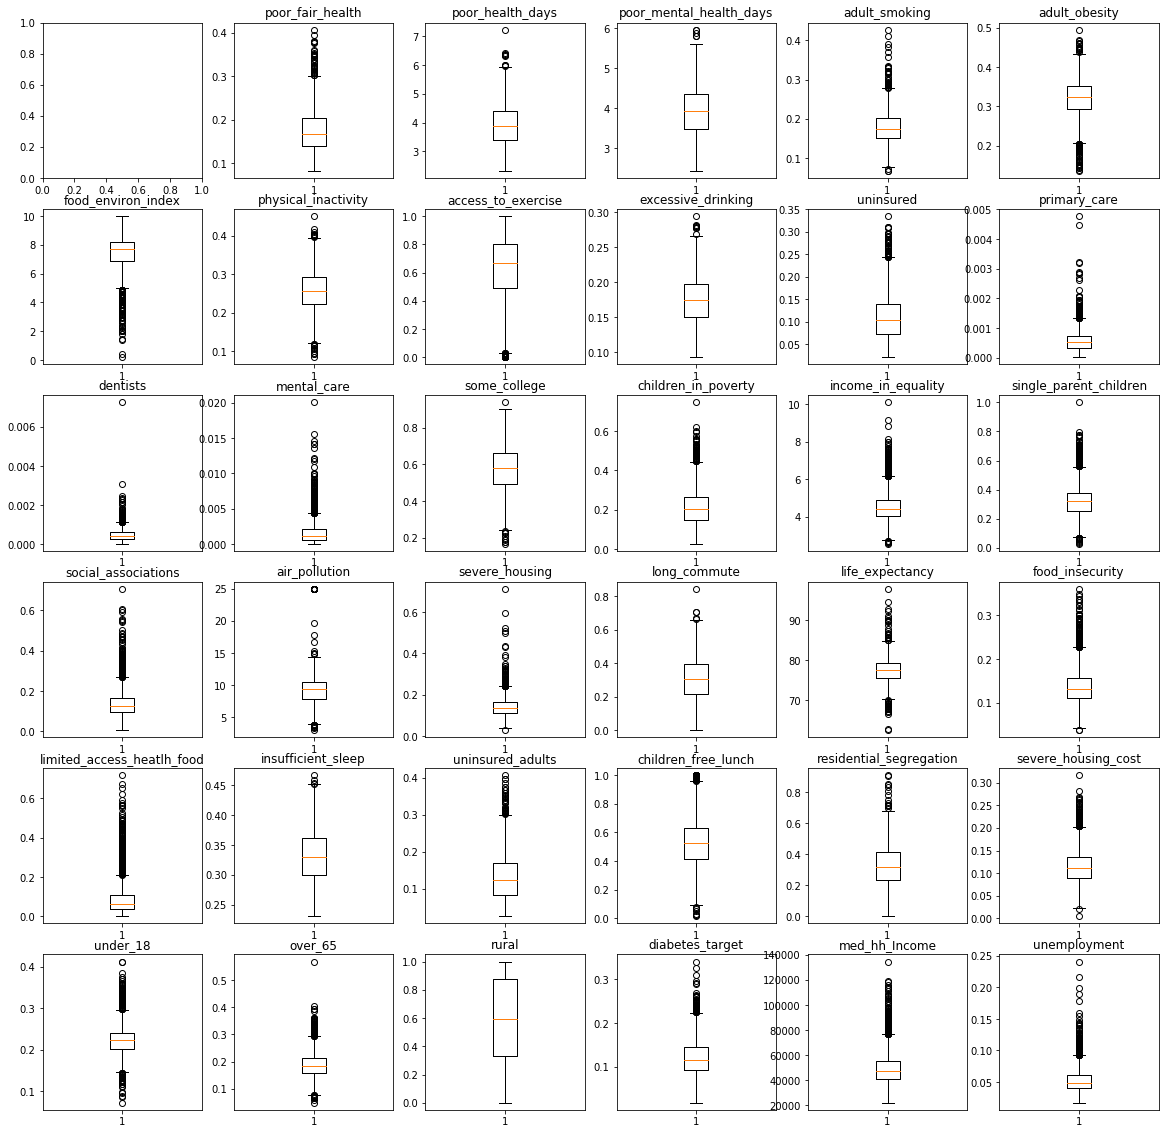

In [82]:
fig2, axes2 = plt.subplots(6, 6, figsize = (20,20))
print(axes2.shape)


for n in range(2,37):
    
    i = df_diabetes_3.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    
    ax = axes2[row][col]
    ax.boxplot(df_diabetes_3[i])
    ax.set_title('{}'.format(i));
    

(6, 6)


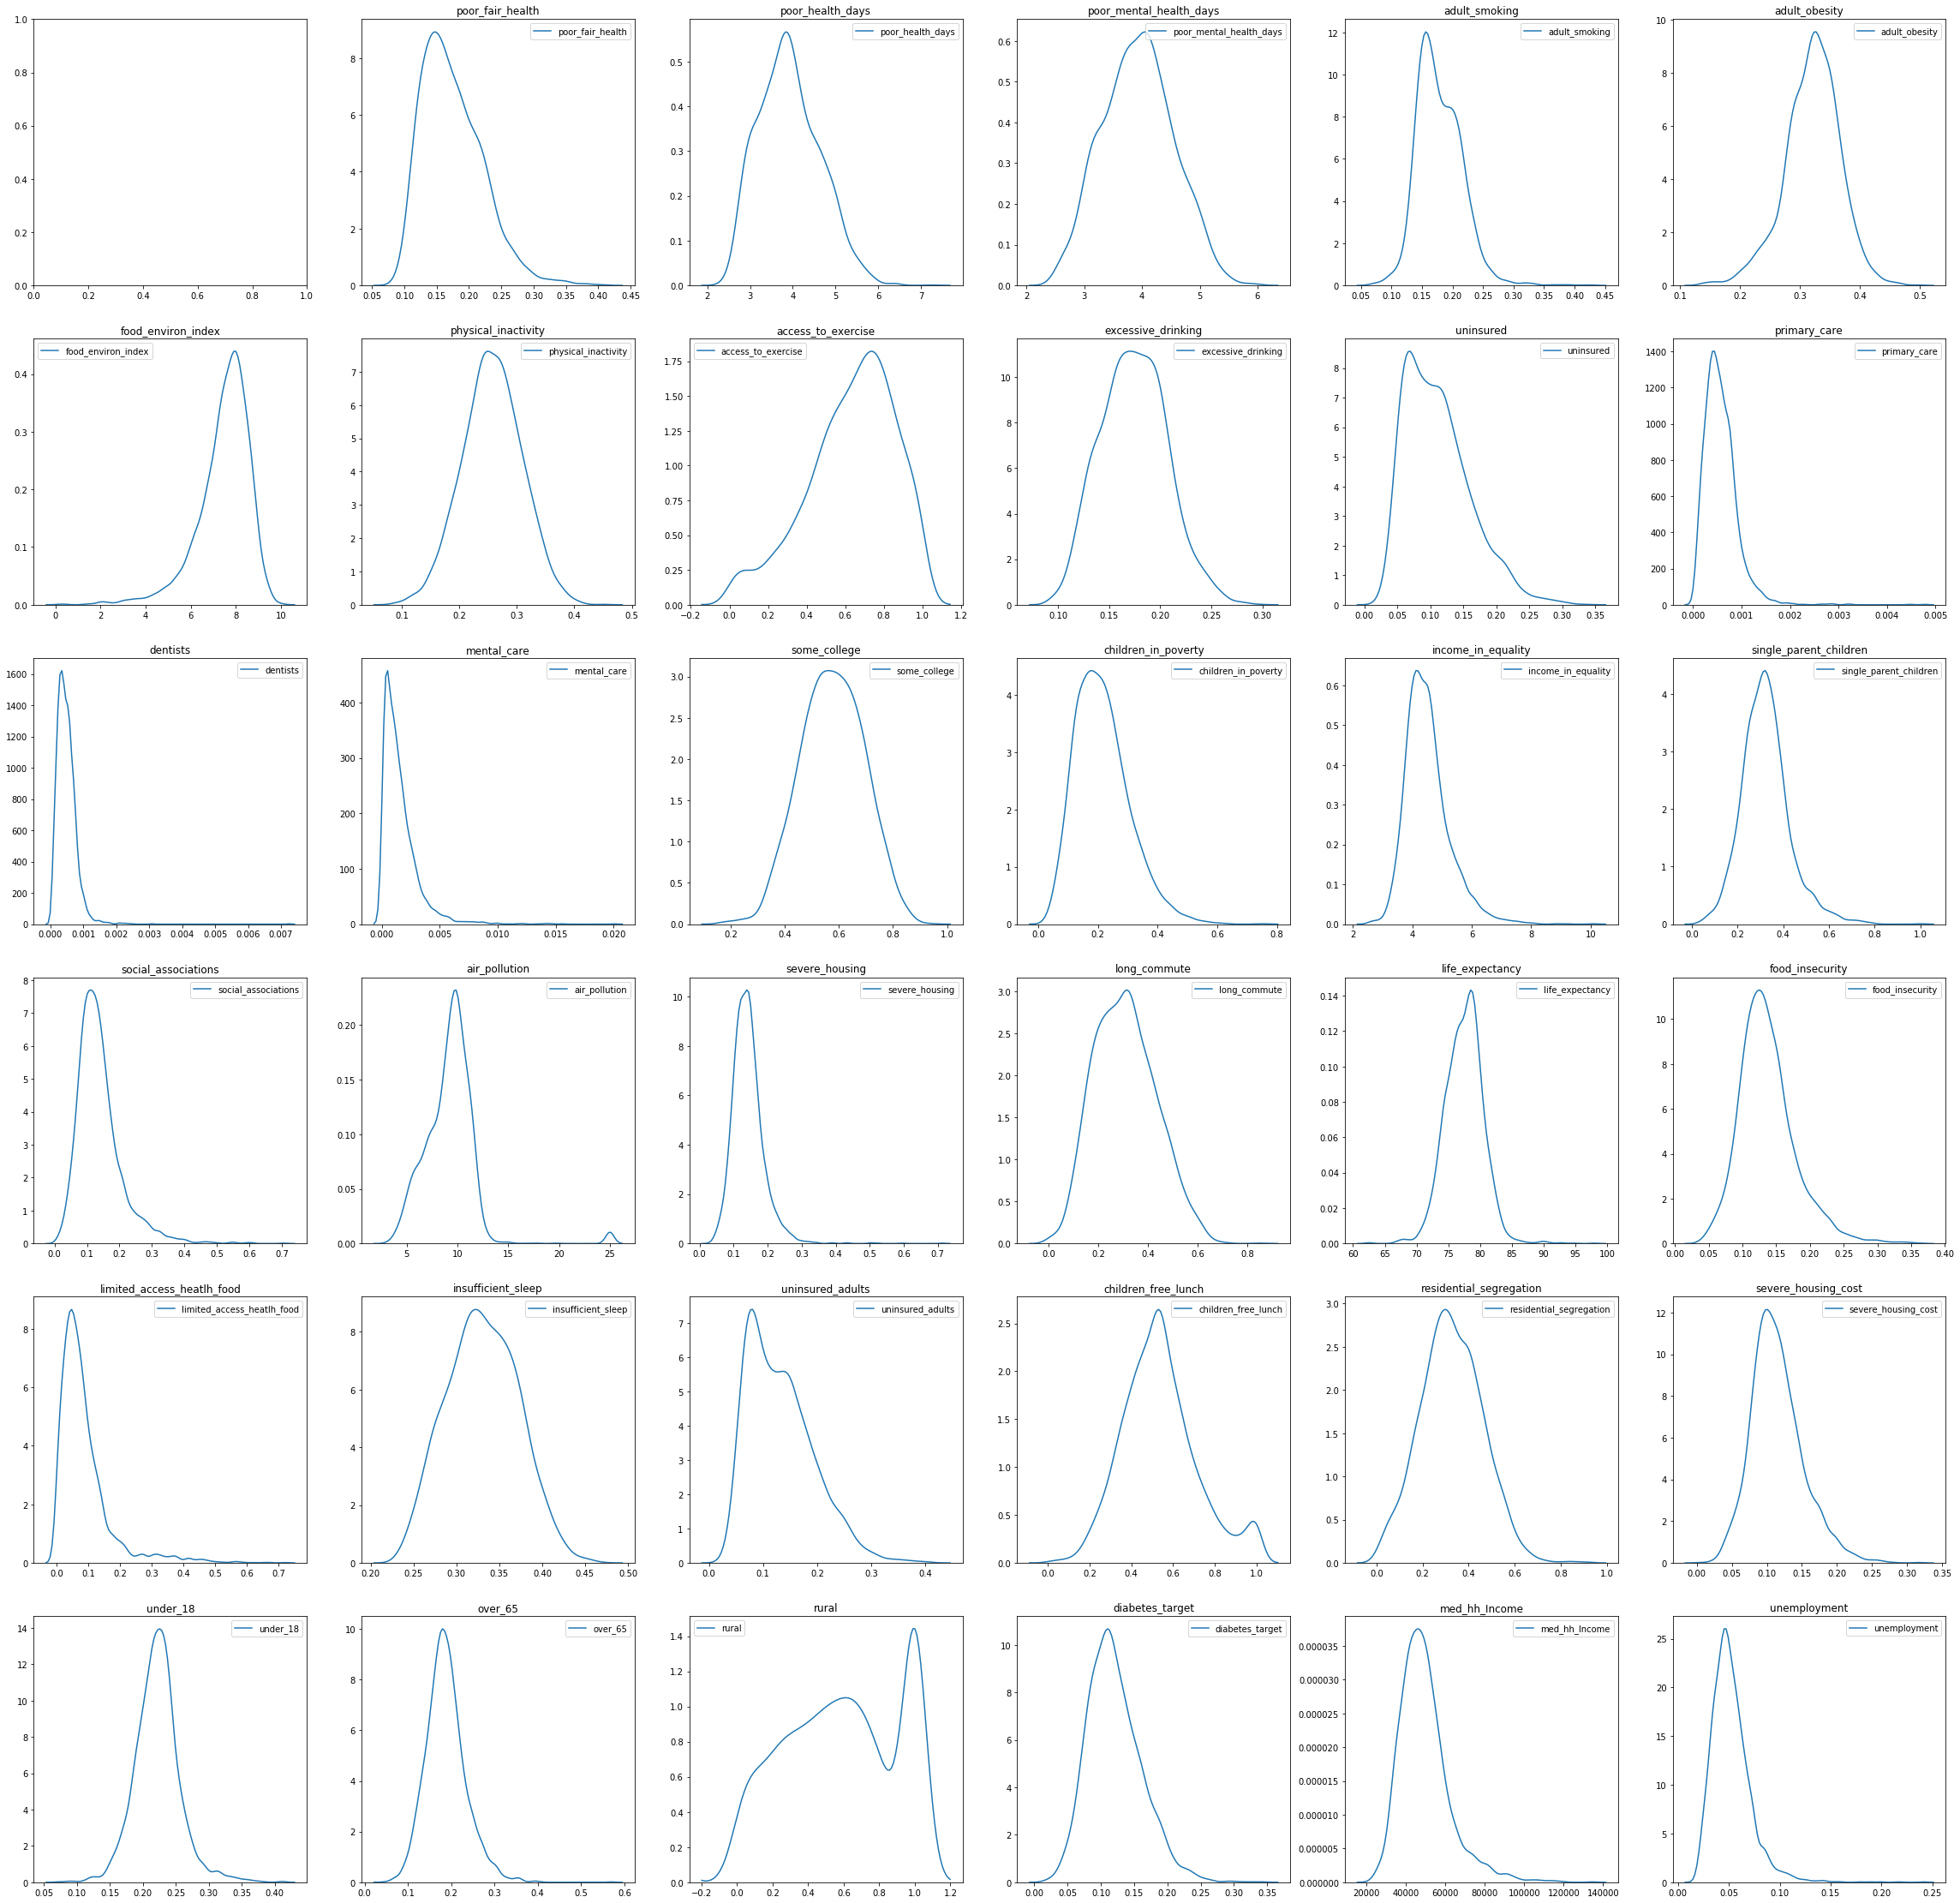

In [83]:
fig2, axes2 = plt.subplots(6, 6, figsize = (40,40))
print(axes2.shape)


for n in range(2,37):
    
    i = df_diabetes_3.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    
    ax = axes2[row][col]
    sns.kdeplot(df_diabetes_3[i], ax = ax)
    ax.set_title('{}'.format(i));

In [93]:
from scipy.stats import normaltest

In [107]:
for col in df_diabetes_3.columns:
    
    if df_diabetes_3[col].dtype == 'float':
        
        if normaltest(df_diabetes_3[col]).pvalue > 0.05:
    
            print(col,':', normaltest(df_diabetes_3[col]).pvalue)
    

physical_inactivity : 0.5656976358723753


only one predictor variable is close to normal. will need to transform every other numeric variable.

In [108]:
df_diabetes_3.columns

Index(['FIPS_code', 'poor_fair_health', 'poor_health_days',
       'poor_mental_health_days', 'adult_smoking', 'adult_obesity',
       'food_environ_index', 'physical_inactivity', 'access_to_exercise',
       'excessive_drinking', 'uninsured', 'primary_care', 'dentists',
       'mental_care', 'some_college', 'children_in_poverty',
       'income_in_equality', 'single_parent_children', 'social_associations',
       'air_pollution', 'severe_housing', 'long_commute', 'life_expectancy',
       'food_insecurity', 'limited_access_heatlh_food', 'insufficient_sleep',
       'uninsured_adults', 'children_free_lunch', 'residential_segregation',
       'severe_housing_cost', 'under_18', 'over_65', 'rural',
       'diabetes_target', 'med_hh_Income', 'unemployment'],
      dtype='object')

In [127]:
df_diabetes_logged = df_diabetes_3.copy()

for col in [x for x in df_diabetes_logged.columns if x not in ['FIPS_code', 'physical_inactivity']]:
    
    if col != 'rural':
    
        df_diabetes_logged[col] = np.log(df_diabetes_logged[col])
        
    else:
        
        df_diabetes_logged[col] = np.log(df_diabetes_logged[col]+10)
    
    

(6, 6)


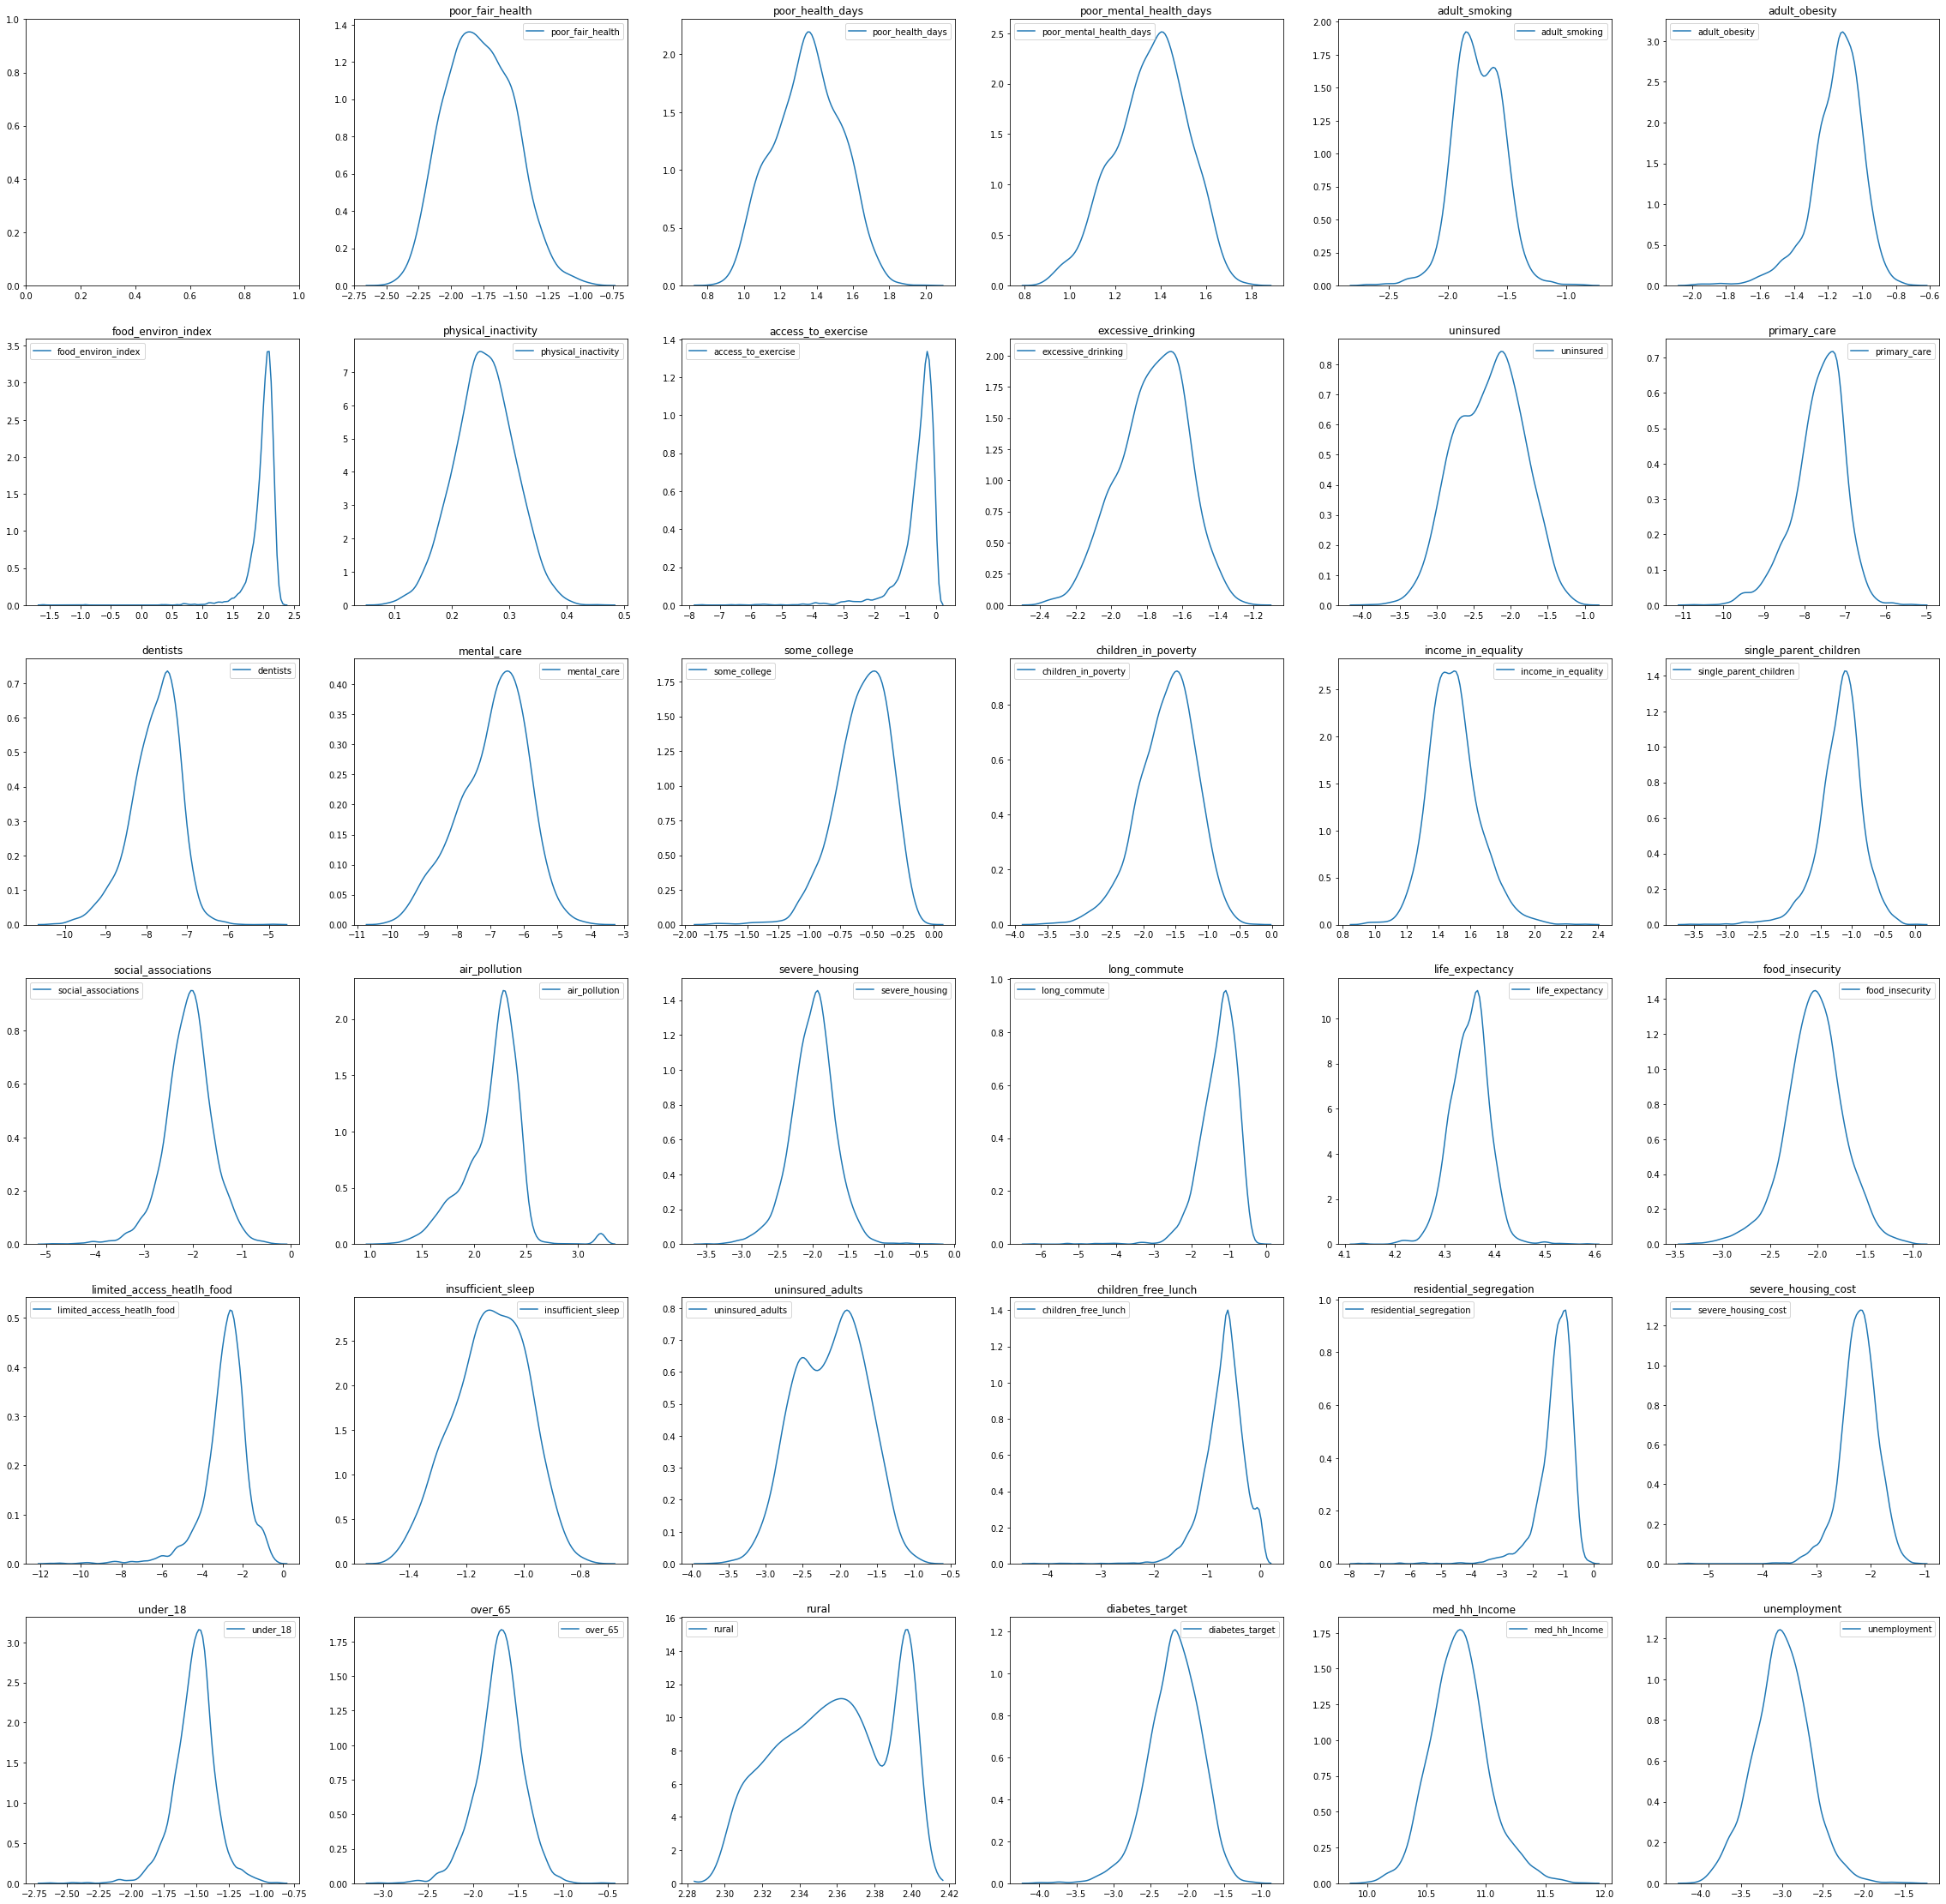

In [128]:
fig2, axes2 = plt.subplots(6, 6, figsize = (40,40))
print(axes2.shape)


for n in range(2,37):
    
    i = df_diabetes_logged.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    
    ax = axes2[row][col]
    sns.kdeplot(df_diabetes_logged[i], ax = ax)
    ax.set_title('{}'.format(i));

In [138]:
for col in df_diabetes_logged.columns:
    
    if df_diabetes_logged[col].dtype == 'float':
        
        if normaltest(df_diabetes_logged[col]).pvalue > 0.05:
    
            print(col,':', normaltest(df_diabetes_logged[col]).pvalue)
    

physical_inactivity : 0.5656976358723753


In [183]:
import seaborn as sns

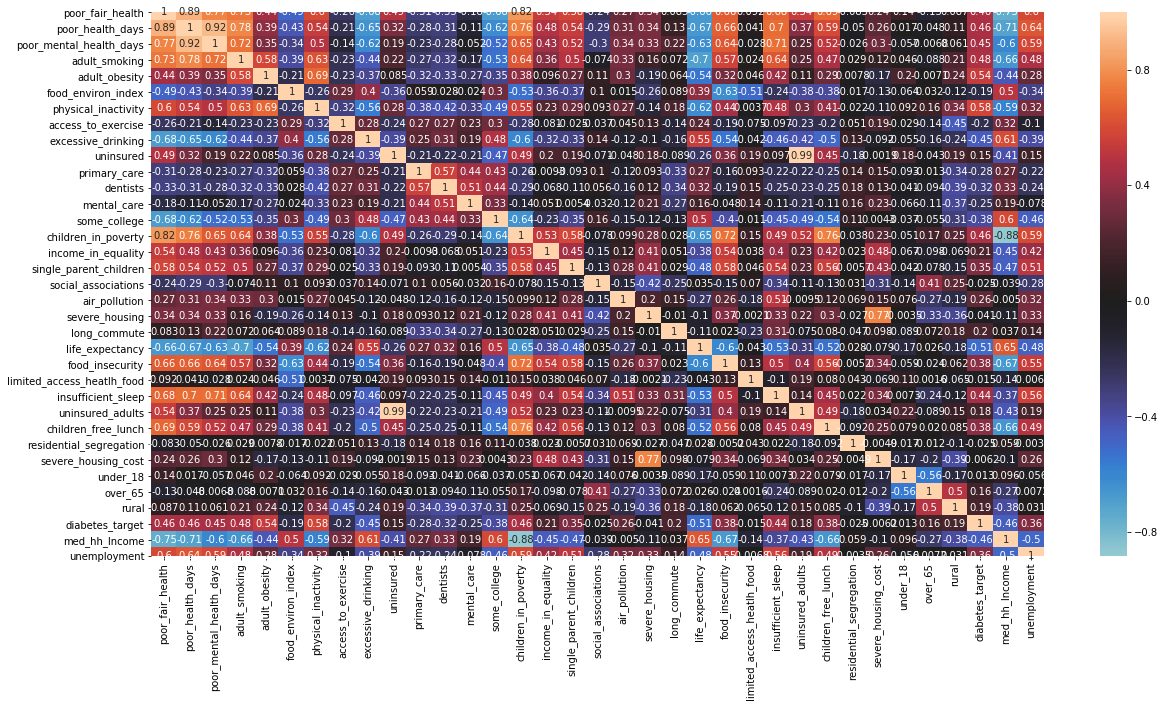

In [348]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_diabetes_logged.corr(), center=0, annot=True);

In [350]:
cols_to_remove = ['uninsured_adults',
'severe_housing_cost',
'med_hh_income',
'life_expectancy',
'some_college',
'poor_fair_health',
'poor_health_days',
'poor_mental_health_days',
'children_free_lunch',
'adult_obesity',
'food_environ_index']

In [351]:
df_diabetes_logged_stripped = df_diabetes_logged.loc[:, [col for col in df_diabetes_logged.columns if col not in cols_to_remove]]

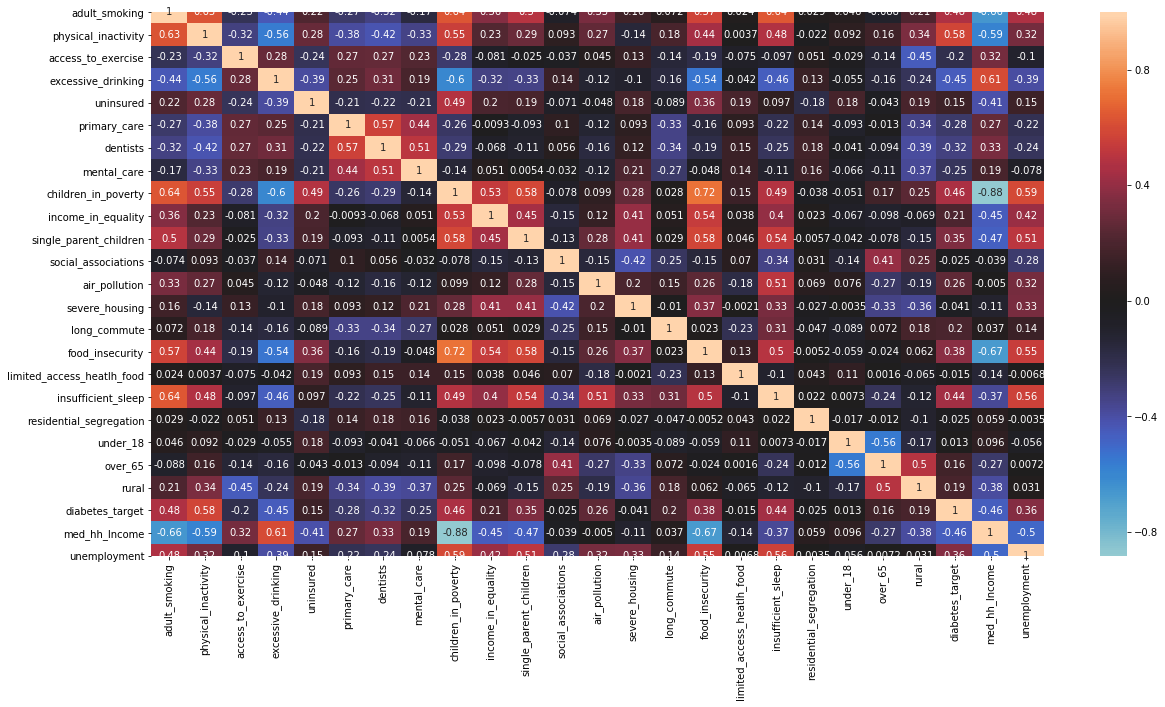

In [352]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_diabetes_logged_stripped.corr(), center=0, annot = True);

In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [354]:
vif_check_df = df_diabetes_logged_stripped.loc[:,[x for x in df_diabetes_logged_stripped.columns if x not in  ['FIPS_code']]]

In [355]:
vif = [variance_inflation_factor(vif_check_df.values, i) for i in range(vif_check_df.shape[1])]
list(zip([x for x in df_diabetes_logged_stripped.columns if x not in  ['FIPS_code']], vif))

[('adult_smoking', 261.6545909810245),
 ('physical_inactivity', 77.68903012127168),
 ('access_to_exercise', 2.4000662631350296),
 ('excessive_drinking', 195.52959855741943),
 ('uninsured', 47.785494736584475),
 ('primary_care', 269.6747610547695),
 ('dentists', 332.0880042542479),
 ('mental_care', 76.51481372812799),
 ('children_in_poverty', 92.59068198980073),
 ('income_in_equality', 159.017183560824),
 ('single_parent_children', 26.469676860152912),
 ('social_associations', 33.17998274151682),
 ('air_pollution', 120.65074253091727),
 ('severe_housing', 87.66259307753116),
 ('long_commute', 11.735833678182429),
 ('food_insecurity', 135.32446754505932),
 ('limited_access_heatlh_food', 9.272138593270656),
 ('insufficient_sleep', 285.9370519056939),
 ('residential_segregation', 6.0472884733661),
 ('under_18', 180.01259903819198),
 ('over_65', 153.55658568408512),
 ('rural', 7421.095264328718),
 ('diabetes_target', 70.0952017550479),
 ('med_hh_Income', 7866.439620726705),
 ('unemployment'

In [356]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [357]:
target = df_diabetes_logged_stripped['diabetes_target']
features = df_diabetes_logged_stripped.drop(columns=['diabetes_target', 'FIPS_code'])

train test split

In [358]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.33)

In [359]:
y_train

435    -1.832581
1585   -1.589635
22     -1.703749
2960   -1.737271
1092   -2.095571
          ...   
1454   -2.659260
2485   -2.419119
3021   -2.189256
278    -2.995732
2566   -2.207275
Name: diabetes_target, Length: 2105, dtype: float64

In [360]:
print(len(X_train))
print(len(X_test))

2105
1037


initialise folds (to be applied on the train data)

In [361]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

In [362]:
regression = LinearRegression()

In [363]:
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))

In [364]:
baseline

0.4295350006770386

In [365]:
# Initialize the scaler
scaler = StandardScaler()

#   Scale all continuous features
#   scale both train and test data.
transformed_training_features = scaler.fit_transform(X_train.iloc[:,:])
transformed_testing_features = scaler.transform(X_test.iloc[:,:])

In [366]:
X_train_transformed = pd.DataFrame(scaler.transform(X_train.iloc[:,:]), 
                                   columns=X_train.columns[:], 
                                   index=X_train.index)

In [367]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test.iloc[:,:]), 
                                   columns=X_test.columns[:], 
                                   index=X_test.index)

In [368]:
X_train.head()

adult_smoking  physical_inactivity  access_to_exercise  \
435       -1.549905                0.317           -0.417712   
1585      -1.720703                0.281           -1.106207   
22        -1.610582                0.300           -1.332674   
2960      -1.576450                0.287           -0.317920   
1092      -1.463713                0.268           -0.287720   

      excessive_drinking  uninsured  primary_care  dentists  mental_care  \
435            -1.955104  -1.708275     -7.448159 -8.147693    -8.147693   
1585           -1.605106  -2.323352     -8.829373 -8.136079    -9.522374   
22             -1.935470  -2.162247     -8.847432 -8.844409    -7.591645   
2960           -1.843335  -2.129497     -7.486104 -8.481203    -7.034284   
1092           -1.995798  -2.858542     -7.267176 -7.266245    -5.576765   

      children_in_poverty  income_in_equality  single_parent_children  \
435             -1.148854            1.589620               -0.974776   
1585            -2.244316            1.263179               -1.963530   
22              -1.227583            1.751485               -0.917923   
2960            -1.220780            1.547645               -1.086419   
1092            -1.335601            1.701244               -1.176466   

      social_associations  air_pollution  severe_housing  long_commute  \
435             -2.372985       2.370244       -1.879140     -1.194022   
1585            -2.209300       2.282382       -2.947359     -0.843970   
22              -2.227359       2.370244       -2.309106     -0.825536   
2960            -2.334390       2.261763       -2.034263     -1.406497   
1092            -1.620552       2.332144       -2.271161     -1.402424   

      food_insecurity  limited_access_heatlh_food  insufficient_sleep  \
435         -1.754464                   -2.817846           -1.003690   
1585        -2.333044                   -3.431882           -1.172961   
22          -1.795767                   -1.769662           -0.979447   
2960        -1.903809                   -3.300301           -0.920368   
1092        -1.820159                   -2.625376           -0.977676   

      residential_segregation  under_18   over_65     rural  med_hh_Income  \
435                 -2.004789 -1.367772 -1.830529  2.360299      10.477795   
1585                -0.790068 -1.474864 -1.762759  2.397895      10.929189   
22                  -1.737252 -1.466025 -1.675443  2.397895      10.528731   
2960                -0.939981 -1.624084 -1.742311  2.357708      10.428512   
1092                -1.106971 -1.452363 -1.717169  2.356502      10.684714   

      unemployment  
435      -2.918771  
1585     -3.381395  
22       -2.847312  
2960     -2.453408  
1092     -2.748872

In [369]:
X_train_transformed.head()

adult_smoking  physical_inactivity  access_to_exercise  \
435        0.957618             1.157017            0.247261   
1585       0.110393             0.464545           -0.798497   
22         0.656638             0.830016           -1.142478   
2960       0.825946             0.579957            0.398834   
1092       1.385169             0.214485            0.444705   

      excessive_drinking  uninsured  primary_care  dentists  mental_care  \
435            -0.999397   1.292271      0.311921 -0.602376    -1.210424   
1585            0.852391  -0.076235     -1.927792 -0.582686    -2.565649   
22             -0.895514   0.282214     -1.957076 -1.783544    -0.662245   
2960           -0.408043   0.355079      0.250391 -1.167788    -0.112772   
1092           -1.214700  -1.266996      0.605394  0.891976     1.324120   

      children_in_poverty  income_in_equality  single_parent_children  \
435              1.068142            0.579701                0.594877   
1585            -1.365708           -1.484641               -2.244880   
22               0.893225            1.603303                0.758160   
2960             0.908339            0.314260                0.274231   
1092             0.653234            1.285594                0.015613   

      social_associations  air_pollution  severe_housing  long_commute  \
435             -0.574496       0.673677        0.352128      0.157561   
1585            -0.235352       0.343966       -3.073758      0.853315   
22              -0.272769       0.673677       -1.026816      0.889954   
2960            -0.494529       0.266590       -0.145368     -0.264748   
1092             0.984483       0.530703       -0.905124     -0.256652   

      food_insecurity  limited_access_heatlh_food  insufficient_sleep  \
435          0.919389                    0.061611            0.866428   
1585        -0.992934                   -0.479265           -0.461867   
22           0.782872                    0.984909            1.056667   
2960         0.425774                   -0.363362            1.520275   
1092         0.702253                    0.231149            1.070563   

      residential_segregation  under_18   over_65     rural  med_hh_Income  \
435                 -1.323019  0.923754 -0.513437  0.040797      -1.247755   
1585                 0.777667  0.249068 -0.240403  1.314939       0.609649   
22                  -0.860352  0.304756  0.111380  1.314939      -1.038164   
2960                 0.518415 -0.691021 -0.158018 -0.047022      -1.450546   
1092                 0.229630  0.390822 -0.056727 -0.087875      -0.396319   

      unemployment  
435       0.247328  
1585     -1.127791  
22        0.459736  
2960      1.630591  
1092      0.752343

In [370]:
from sklearn.metrics import SCORERS

In [371]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [372]:
from sklearn.model_selection import cross_validate

In [373]:
a = cross_validate(regression, X_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [374]:
for k, v in a.items():
    
    print(k, np.mean(v))

fit_time 0.004971981048583984
score_time 0.0034379482269287108
test_r2 0.4295350006770386
train_r2 0.45038790392562084
test_neg_mean_squared_error -0.06852871177956113
train_neg_mean_squared_error -0.06627235428098165


In [375]:
b = cross_validate(regression, X_train_transformed, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [376]:
for k, v in b.items():
    
    print(k, np.mean(v))

fit_time 0.004746580123901367
score_time 0.003575754165649414
test_r2 0.4295350006770384
train_r2 0.45038790392562084
test_neg_mean_squared_error -0.06852871177956113
train_neg_mean_squared_error -0.06627235428098165


In [377]:
from sklearn.preprocessing import PolynomialFeatures

In [384]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [385]:
X_poly_train = pd.DataFrame(poly.fit_transform(X_train_transformed), columns=poly.get_feature_names(features.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test_transformed), columns=poly.get_feature_names(features.columns))
X_poly_train.head()

adult_smoking  physical_inactivity  access_to_exercise  excessive_drinking  \
0       0.957618             1.157017            0.247261           -0.999397   
1       0.110393             0.464545           -0.798497            0.852391   
2       0.656638             0.830016           -1.142478           -0.895514   
3       0.825946             0.579957            0.398834           -0.408043   
4       1.385169             0.214485            0.444705           -1.214700   

   uninsured  primary_care  dentists  mental_care  children_in_poverty  \
0   1.292271      0.311921 -0.602376    -1.210424             1.068142   
1  -0.076235     -1.927792 -0.582686    -2.565649            -1.365708   
2   0.282214     -1.957076 -1.783544    -0.662245             0.893225   
3   0.355079      0.250391 -1.167788    -0.112772             0.908339   
4  -1.266996      0.605394  0.891976     1.324120             0.653234   

   income_in_equality  single_parent_children  social_associations  \
0            0.579701                0.594877            -0.574496   
1           -1.484641               -2.244880            -0.235352   
2            1.603303                0.758160            -0.272769   
3            0.314260                0.274231            -0.494529   
4            1.285594                0.015613             0.984483   

   air_pollution  severe_housing  long_commute  food_insecurity  \
0       0.673677        0.352128      0.157561         0.919389   
1       0.343966       -3.073758      0.853315        -0.992934   
2       0.673677       -1.026816      0.889954         0.782872   
3       0.266590       -0.145368     -0.264748         0.425774   
4       0.530703       -0.905124     -0.256652         0.702253   

   limited_access_heatlh_food  insufficient_sleep  residential_segregation  \
0                    0.061611            0.866428                -1.323019   
1                   -0.479265           -0.461867                 0.777667   
2                    0.984909            1.056667                -0.860352   
3                   -0.363362            1.520275                 0.518415   
4                    0.231149            1.070563                 0.229630   

   under_18   over_65     rural  med_hh_Income  unemployment  adult_smoking^2  \
0  0.923754 -0.513437  0.040797      -1.247755      0.247328         0.917032   
1  0.249068 -0.240403  1.314939       0.609649     -1.127791         0.012187   
2  0.304756  0.111380  1.314939      -1.038164      0.459736         0.431173   
3 -0.691021 -0.158018 -0.047022      -1.450546      1.630591         0.682186   
4  0.390822 -0.056727 -0.087875      -0.396319      0.752343         1.918693   

   adult_smoking physical_inactivity  adult_smoking access_to_exercise  \
0                           1.107980                          0.236781   
1                           0.051282                         -0.088148   
2                           0.545020                         -0.750194   
3                           0.479013                          0.329415   
4                           0.297098                          0.615991   

   adult_smoking excessive_drinking  adult_smoking uninsured  \
0                         -0.957041                 1.237502   
1                          0.094098                -0.008416   
2                         -0.588028                 0.185312   
3                         -0.337021                 0.293276   
4                         -1.682565                -1.755004   

   adult_smoking primary_care  adult_smoking dentists  \
0                    0.298701               -0.576847   
1                   -0.212815               -0.064324   
2                   -1.285090               -1.171142   
3                    0.206810               -0.964529   
4                    0.838572                1.235538   

   adult_smoking mental_care  adult_smoking children_in_poverty  \
0                  -1.159123                       

In [386]:
len(X_poly_train.columns)

324

In [387]:
vif_check_df = X_poly_train.loc[:,[x for x in X_poly_train.columns if x not in  ['FIPS_code']]]

In [388]:
def takeSecond(elem):
    return elem[1]

In [389]:
vif = [variance_inflation_factor(vif_check_df.values, i) for i in range(vif_check_df.shape[1])]
vif_2 = list(zip([x for x in X_poly_train.columns if x not in ['FIPS_code']], vif))

In [390]:
vif_2.sort(key = takeSecond, reverse = 1)

In [391]:
vif_2

[('children_in_poverty med_hh_Income', 324.6042167416081),
 ('children_in_poverty^2', 138.99148547153257),
 ('med_hh_Income^2', 136.58339921764164),
 ('adult_smoking med_hh_Income', 100.93743228729038),
 ('adult_smoking children_in_poverty', 79.74998882055574),
 ('children_in_poverty food_insecurity', 72.13889192259923),
 ('food_insecurity med_hh_Income', 69.36437483121647),
 ('physical_inactivity med_hh_Income', 52.31072510930181),
 ('physical_inactivity children_in_poverty', 52.12636549244776),
 ('children_in_poverty insufficient_sleep', 48.73231693874788),
 ('insufficient_sleep med_hh_Income', 46.29929425444238),
 ('over_65 med_hh_Income', 45.65356971296591),
 ('excessive_drinking med_hh_Income', 43.79831073338367),
 ('children_in_poverty over_65', 43.180042930502466),
 ('excessive_drinking children_in_poverty', 40.68835755612962),
 ('adult_smoking^2', 38.83183474882622),
 ('single_parent_children med_hh_Income', 34.92344696148631),
 ('children_in_poverty unemployment', 34.628696407

In [392]:
c = cross_validate(regression, X_poly_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [393]:
for k, v in c.items():
    
    print(k, np.mean(v))

fit_time 0.04633221626281738
score_time 0.002705669403076172
test_r2 0.2691538784175084
train_r2 0.6277305279090664
test_neg_mean_squared_error -0.08840400445369039
train_neg_mean_squared_error -0.044890473255382424


In [394]:
X_poly_train.iloc[:,range(0,col)]

adult_smoking  physical_inactivity  access_to_exercise  \
0          0.957618             1.157017            0.247261   
1          0.110393             0.464545           -0.798497   
2          0.656638             0.830016           -1.142478   
3          0.825946             0.579957            0.398834   
4          1.385169             0.214485            0.444705   
...             ...                  ...                 ...   
2100       2.138058             1.272428           -1.711409   
2101       1.817576             1.195487           -1.167966   
2102      -1.082662            -0.958870            0.429586   
2103      -1.141630            -1.785989           -0.449110   
2104       0.330003            -0.343339            0.021360   

      excessive_drinking  uninsured  primary_care  dentists  mental_care  \
0              -0.999397   1.292271      0.311921 -0.602376    -1.210424   
1               0.852391  -0.076235     -1.927792 -0.582686    -2.565649   
2              -0.895514   0.282214     -1.957076 -1.783544    -0.662245   
3              -0.408043   0.355079      0.250391 -1.167788    -0.112772   
4              -1.214700  -1.266996      0.605394  0.891976     1.324120   
...                  ...        ...           ...       ...          ...   
2100           -2.266787   1.250117      0.151518  0.210596     0.360814   
2101           -2.049741   0.446672     -0.351189 -1.961480     0.357071   
2102           -0.344261  -0.427096      0.619529 -1.375759     0.222368   
2103           -0.019108   0.337262      0.847299  1.107117     0.922711   
2104           -0.170089  -0.649769     -0.640089  0.049450    -0.591209   

      children_in_poverty  income_in_equality  single_parent_children  \
0                1.068142            0.579701                0.594877   
1               -1.365708           -1.484641               -2.244880   
2                0.893225            1.603303                0.758160   
3                0.908339            0.314260                0.274231   
4                0.653234            1.285594                0.015613   
...                   ...                 ...                     ...   
2100             2.080611            0.833827                1.632396   
2101             1.143930            1.084446                0.125280   
2102             0.205515           -0.997107               -0.767755   
2103            -0.342534           -0.762407               -0.036547   
2104            -1.303702           -0.858462               -0.608946   

      social_associations  air_pollution  severe_housing  long_commute  \
0               -0.574496       0.673677        0.352128      0.157561   
1               -0.235352       0.343966       -3.073758      0.853315   
2               -0.272769       0.673677       -1.026816      0.889954   
3               -0.494529       0.266590       -0.145368     -0.264748   
4                0.984483       0.530703       -0.905124     -0.256652   
...                   ...            ...             ...           ...   
2100            -0.962645       0.227295        1.142503      0.374829   
2101            -1.799530       0.382064        0.152803      0.925929   
2102            -0.269633      -1.254970        0.362382      0.302981   
2103             2.341251      -3.211204        0.829183     -1.802871   
2104            -0.425218       0.811404       -0.191680      1.108872   

      food_insecurity  limited_access_heatlh_food  insufficient_sleep  \
0            0.919389                    0.061611            0.866428   
1           -0.992934                   -0.479265           -0.461867   
2            0.782872                    0.984909            1.056667   
3            0.425774                   -0.363362            1.520275   
4            0.702253                    0.231149            1.070563   
...               ...                         ...                 ...   
2100         3.063890                    1.3953

In [395]:
for col in range(1, len(X_poly_train.columns)):
    
    X_powers_2 = X_poly_train.iloc[:,range(0,col)]
    
    d = cross_validate(regression, X_powers_2, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)
    
    for k, v in d.items():
    
        print(col, X_poly_train.columns[col],  k, np.mean(v))

1 physical_inactivity fit_time 0.0035993576049804686
1 physical_inactivity score_time 0.0028768062591552736
1 physical_inactivity test_r2 0.22117275842327694
1 physical_inactivity train_r2 0.22470632519515896
1 physical_inactivity test_neg_mean_squared_error -0.09394274513559593
1 physical_inactivity train_neg_mean_squared_error -0.09350939585223386
2 access_to_exercise fit_time 0.003729104995727539
2 access_to_exercise score_time 0.0037038326263427734
2 access_to_exercise test_r2 0.34909619761588695
2 access_to_exercise train_r2 0.35437307686977493
2 access_to_exercise test_neg_mean_squared_error -0.07833882430844749
2 access_to_exercise train_neg_mean_squared_error -0.07785791034221574
3 excessive_drinking fit_time 0.0024524688720703124
3 excessive_drinking score_time 0.0020571231842041017
3 excessive_drinking test_r2 0.3490131287195079
3 excessive_drinking train_r2 0.35451829290162584
3 excessive_drinking test_neg_mean_squared_error -0.07834840094641467
3 excessive_drinking train_ne

28 adult_smoking uninsured fit_time 0.002863168716430664
28 adult_smoking uninsured score_time 0.0019135475158691406
28 adult_smoking uninsured test_r2 0.42827499070423763
28 adult_smoking uninsured train_r2 0.4538541813946084
28 adult_smoking uninsured test_neg_mean_squared_error -0.06865841951780402
28 adult_smoking uninsured train_neg_mean_squared_error -0.06585338379187258
29 adult_smoking primary_care fit_time 0.00383453369140625
29 adult_smoking primary_care score_time 0.002957439422607422
29 adult_smoking primary_care test_r2 0.4331268906633947
29 adult_smoking primary_care train_r2 0.4597824890453019
29 adult_smoking primary_care test_neg_mean_squared_error -0.06807962573334135
29 adult_smoking primary_care train_neg_mean_squared_error -0.06513880412159848
30 adult_smoking dentists fit_time 0.0030868053436279297
30 adult_smoking dentists score_time 0.002464914321899414
30 adult_smoking dentists test_r2 0.4309879643818972
30 adult_smoking dentists train_r2 0.46018086079374765
30

51 physical_inactivity uninsured fit_time 0.004566621780395508
51 physical_inactivity uninsured score_time 0.002485227584838867
51 physical_inactivity uninsured test_r2 0.43850951572419633
51 physical_inactivity uninsured train_r2 0.477734046849145
51 physical_inactivity uninsured test_neg_mean_squared_error -0.06741413655476586
51 physical_inactivity uninsured train_neg_mean_squared_error -0.06297381465752858
52 physical_inactivity primary_care fit_time 0.003688335418701172
52 physical_inactivity primary_care score_time 0.0019461631774902344
52 physical_inactivity primary_care test_r2 0.4398348650604456
52 physical_inactivity primary_care train_r2 0.4799012558698463
52 physical_inactivity primary_care test_neg_mean_squared_error -0.06722914244416792
52 physical_inactivity primary_care train_neg_mean_squared_error -0.0627112741488661
53 physical_inactivity dentists fit_time 0.0036865711212158204
53 physical_inactivity dentists score_time 0.002375173568725586
53 physical_inactivity dent

71 access_to_exercise^2 fit_time 0.008164787292480468
71 access_to_exercise^2 score_time 0.003894615173339844
71 access_to_exercise^2 test_r2 0.4350459714162179
71 access_to_exercise^2 train_r2 0.4931304116171297
71 access_to_exercise^2 test_neg_mean_squared_error -0.06780126923085246
71 access_to_exercise^2 train_neg_mean_squared_error -0.061115159611719226
72 access_to_exercise excessive_drinking fit_time 0.005876684188842773
72 access_to_exercise excessive_drinking score_time 0.002589893341064453
72 access_to_exercise excessive_drinking test_r2 0.4341410959200488
72 access_to_exercise excessive_drinking train_r2 0.4931819939364116
72 access_to_exercise excessive_drinking test_neg_mean_squared_error -0.06790284389406731
72 access_to_exercise excessive_drinking train_neg_mean_squared_error -0.06110886534987899
73 access_to_exercise uninsured fit_time 0.0056610584259033205
73 access_to_exercise uninsured score_time 0.002432584762573242
73 access_to_exercise uninsured test_r2 0.43458428

92 access_to_exercise unemployment fit_time 0.007886981964111328
92 access_to_exercise unemployment score_time 0.0026979923248291017
92 access_to_exercise unemployment test_r2 0.41280666672751865
92 access_to_exercise unemployment train_r2 0.5090394975330923
92 access_to_exercise unemployment test_neg_mean_squared_error -0.07031310867642951
92 access_to_exercise unemployment train_neg_mean_squared_error -0.05919413544527854
93 excessive_drinking^2 fit_time 0.008118963241577149
93 excessive_drinking^2 score_time 0.0024116039276123047
93 excessive_drinking^2 test_r2 0.40859741853100184
93 excessive_drinking^2 train_r2 0.5110609915713639
93 excessive_drinking^2 test_neg_mean_squared_error -0.0707217584693017
93 excessive_drinking^2 train_neg_mean_squared_error -0.058950231319345035
94 excessive_drinking uninsured fit_time 0.005813074111938476
94 excessive_drinking uninsured score_time 0.002202939987182617
94 excessive_drinking uninsured test_r2 0.41179941858916214
94 excessive_drinking un

112 excessive_drinking med_hh_Income fit_time 0.00960230827331543
112 excessive_drinking med_hh_Income score_time 0.002971506118774414
112 excessive_drinking med_hh_Income test_r2 0.40382572560763047
112 excessive_drinking med_hh_Income train_r2 0.523610207321322
112 excessive_drinking med_hh_Income test_neg_mean_squared_error -0.0713393695139237
112 excessive_drinking med_hh_Income train_neg_mean_squared_error -0.057439051354875495
113 excessive_drinking unemployment fit_time 0.01111464500427246
113 excessive_drinking unemployment score_time 0.003282022476196289
113 excessive_drinking unemployment test_r2 0.40375224443676627
113 excessive_drinking unemployment train_r2 0.5261558835683802
113 excessive_drinking unemployment test_neg_mean_squared_error -0.07132977463195682
113 excessive_drinking unemployment train_neg_mean_squared_error -0.057132377026356505
114 uninsured^2 fit_time 0.009097862243652343
114 uninsured^2 score_time 0.002746295928955078
114 uninsured^2 test_r2 0.4033221116

135 primary_care dentists fit_time 0.009893035888671875
135 primary_care dentists score_time 0.0023069858551025392
135 primary_care dentists test_r2 0.40907183102873124
135 primary_care dentists train_r2 0.5416236605424453
135 primary_care dentists test_neg_mean_squared_error -0.07069562546564626
135 primary_care dentists train_neg_mean_squared_error -0.05526471868613658
136 primary_care mental_care fit_time 0.015154457092285157
136 primary_care mental_care score_time 0.0034253597259521484
136 primary_care mental_care test_r2 0.4085371640192196
136 primary_care mental_care train_r2 0.5416794645927527
136 primary_care mental_care test_neg_mean_squared_error -0.070760654000339
136 primary_care mental_care train_neg_mean_squared_error -0.055257967832713785
137 primary_care children_in_poverty fit_time 0.01011519432067871
137 primary_care children_in_poverty score_time 0.002331399917602539
137 primary_care children_in_poverty test_r2 0.4093453723090336
137 primary_care children_in_poverty 

157 dentists single_parent_children fit_time 0.012279748916625977
157 dentists single_parent_children score_time 0.0025098323822021484
157 dentists single_parent_children test_r2 0.4034750476072125
157 dentists single_parent_children train_r2 0.5503386326716696
157 dentists single_parent_children test_neg_mean_squared_error -0.07145311289434025
157 dentists single_parent_children train_neg_mean_squared_error -0.05421550302848129
158 dentists social_associations fit_time 0.01190495491027832
158 dentists social_associations score_time 0.002406787872314453
158 dentists social_associations test_r2 0.40086894521653316
158 dentists social_associations train_r2 0.550872433352201
158 dentists social_associations test_neg_mean_squared_error -0.07177311280455874
158 dentists social_associations train_neg_mean_squared_error -0.05415092217144526
159 dentists air_pollution fit_time 0.01146712303161621
159 dentists air_pollution score_time 0.0025008201599121095
159 dentists air_pollution test_r2 0.3

179 mental_care food_insecurity fit_time 0.019488811492919922
179 mental_care food_insecurity score_time 0.002883243560791016
179 mental_care food_insecurity test_r2 0.3972753915240889
179 mental_care food_insecurity train_r2 0.5618986900747263
179 mental_care food_insecurity test_neg_mean_squared_error -0.07218169283462803
179 mental_care food_insecurity train_neg_mean_squared_error -0.05282224099330509
180 mental_care limited_access_heatlh_food fit_time 0.014944744110107423
180 mental_care limited_access_heatlh_food score_time 0.0025592327117919924
180 mental_care limited_access_heatlh_food test_r2 0.39748212477554945
180 mental_care limited_access_heatlh_food train_r2 0.562043913135755
180 mental_care limited_access_heatlh_food test_neg_mean_squared_error -0.072157188384993
180 mental_care limited_access_heatlh_food train_neg_mean_squared_error -0.05280477034495199
181 mental_care insufficient_sleep fit_time 0.015667438507080078
181 mental_care insufficient_sleep score_time 0.002459

199 children_in_poverty under_18 fit_time 0.01828465461730957
199 children_in_poverty under_18 score_time 0.002635765075683594
199 children_in_poverty under_18 test_r2 0.3929761713874874
199 children_in_poverty under_18 train_r2 0.5723077305557485
199 children_in_poverty under_18 test_neg_mean_squared_error -0.07266273128053821
199 children_in_poverty under_18 train_neg_mean_squared_error -0.05156883369630537
200 children_in_poverty over_65 fit_time 0.01690225601196289
200 children_in_poverty over_65 score_time 0.0025337696075439452
200 children_in_poverty over_65 test_r2 0.3929729132833176
200 children_in_poverty over_65 train_r2 0.5724068202070448
200 children_in_poverty over_65 test_neg_mean_squared_error -0.07267541240033223
200 children_in_poverty over_65 train_neg_mean_squared_error -0.05155700858146569
201 children_in_poverty rural fit_time 0.018712902069091798
201 children_in_poverty rural score_time 0.002741718292236328
201 children_in_poverty rural test_r2 0.3926101090044421


219 single_parent_children^2 fit_time 0.02533750534057617
219 single_parent_children^2 score_time 0.0024765491485595702
219 single_parent_children^2 test_r2 0.38215884372181497
219 single_parent_children^2 train_r2 0.5791508477776807
219 single_parent_children^2 test_neg_mean_squared_error -0.07401852057935004
219 single_parent_children^2 train_neg_mean_squared_error -0.05074336168933137
220 single_parent_children social_associations fit_time 0.022065162658691406
220 single_parent_children social_associations score_time 0.0024784088134765627
220 single_parent_children social_associations test_r2 0.3833905334794627
220 single_parent_children social_associations train_r2 0.5796884733842467
220 single_parent_children social_associations test_neg_mean_squared_error -0.07389190707481
220 single_parent_children social_associations train_neg_mean_squared_error -0.050679126894286164
221 single_parent_children air_pollution fit_time 0.02384214401245117
221 single_parent_children air_pollution s

238 social_associations limited_access_heatlh_food fit_time 0.07703804969787598
238 social_associations limited_access_heatlh_food score_time 0.010460615158081055
238 social_associations limited_access_heatlh_food test_r2 0.3871999880470056
238 social_associations limited_access_heatlh_food train_r2 0.5932446063508998
238 social_associations limited_access_heatlh_food test_neg_mean_squared_error -0.07342894173404954
238 social_associations limited_access_heatlh_food train_neg_mean_squared_error -0.049043318336458086
239 social_associations insufficient_sleep fit_time 0.039490365982055665
239 social_associations insufficient_sleep score_time 0.005910110473632812
239 social_associations insufficient_sleep test_r2 0.3810477347223278
239 social_associations insufficient_sleep train_r2 0.5939087594222869
239 social_associations insufficient_sleep test_neg_mean_squared_error -0.07412187273354455
239 social_associations insufficient_sleep train_neg_mean_squared_error -0.04896266522684994
240 

258 severe_housing^2 fit_time 0.027985763549804688
258 severe_housing^2 score_time 0.002841281890869141
258 severe_housing^2 test_r2 0.3754216548653082
258 severe_housing^2 train_r2 0.5999361766739056
258 severe_housing^2 test_neg_mean_squared_error -0.07479629701444544
258 severe_housing^2 train_neg_mean_squared_error -0.04823575487300548
259 severe_housing long_commute fit_time 0.02669696807861328
259 severe_housing long_commute score_time 0.0027466297149658205
259 severe_housing long_commute test_r2 0.3764869452727763
259 severe_housing long_commute train_r2 0.6005519012450585
259 severe_housing long_commute test_neg_mean_squared_error -0.07465341206027201
259 severe_housing long_commute train_neg_mean_squared_error -0.048161026293527
260 severe_housing food_insecurity fit_time 0.02836918830871582
260 severe_housing food_insecurity score_time 0.0029036998748779297
260 severe_housing food_insecurity test_r2 0.3767611560003984
260 severe_housing food_insecurity train_r2 0.600625978644

279 food_insecurity^2 fit_time 0.03342123031616211
279 food_insecurity^2 score_time 0.002802324295043945
279 food_insecurity^2 test_r2 0.35647785263213033
279 food_insecurity^2 train_r2 0.6076666834522599
279 food_insecurity^2 test_neg_mean_squared_error -0.07712537983142154
279 food_insecurity^2 train_neg_mean_squared_error -0.047303932583640386
280 food_insecurity limited_access_heatlh_food fit_time 0.02956838607788086
280 food_insecurity limited_access_heatlh_food score_time 0.002701425552368164
280 food_insecurity limited_access_heatlh_food test_r2 0.3562358908582601
280 food_insecurity limited_access_heatlh_food train_r2 0.607912641610952
280 food_insecurity limited_access_heatlh_food test_neg_mean_squared_error -0.07715374756329889
280 food_insecurity limited_access_heatlh_food train_neg_mean_squared_error -0.04727413096198256
281 food_insecurity insufficient_sleep fit_time 0.03420038223266601
281 food_insecurity insufficient_sleep score_time 0.00311279296875
281 food_insecurity 

298 insufficient_sleep under_18 fit_time 0.03592615127563477
298 insufficient_sleep under_18 score_time 0.003066682815551758
298 insufficient_sleep under_18 test_r2 0.3406417403615495
298 insufficient_sleep under_18 train_r2 0.6152758671045888
298 insufficient_sleep under_18 test_neg_mean_squared_error -0.07909461722994002
298 insufficient_sleep under_18 train_neg_mean_squared_error -0.046388389317632284
299 insufficient_sleep over_65 fit_time 0.034879207611083984
299 insufficient_sleep over_65 score_time 0.0029699325561523436
299 insufficient_sleep over_65 test_r2 0.3452962625663413
299 insufficient_sleep over_65 train_r2 0.6168527920410496
299 insufficient_sleep over_65 test_neg_mean_squared_error -0.07849741281493842
299 insufficient_sleep over_65 train_neg_mean_squared_error -0.046197165179470236
300 insufficient_sleep rural fit_time 0.036783027648925784
300 insufficient_sleep rural score_time 0.003232860565185547
300 insufficient_sleep rural test_r2 0.34183230035739454
300 insuffi

320 rural unemployment fit_time 0.04679651260375976
320 rural unemployment score_time 0.003655672073364258
320 rural unemployment test_r2 0.27483276730741046
320 rural unemployment train_r2 0.627225168487359
320 rural unemployment test_neg_mean_squared_error -0.08768313378505935
320 rural unemployment train_neg_mean_squared_error -0.044951647671519074
321 med_hh_Income^2 fit_time 0.046258163452148435
321 med_hh_Income^2 score_time 0.00335545539855957
321 med_hh_Income^2 test_r2 0.2739338947443952
321 med_hh_Income^2 train_r2 0.627350565328112
321 med_hh_Income^2 test_neg_mean_squared_error -0.08780984148072464
321 med_hh_Income^2 train_neg_mean_squared_error -0.04493648545426965
322 med_hh_Income unemployment fit_time 0.0411036491394043
322 med_hh_Income unemployment score_time 0.002773761749267578
322 med_hh_Income unemployment test_r2 0.2744054433023714
322 med_hh_Income unemployment train_r2 0.6274873121728684
322 med_hh_Income unemployment test_neg_mean_squared_error -0.08774841468

In [400]:
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest

In [401]:
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)  #   again, we use fit_transform on the training set
X_k_best_test= selector.transform(X_poly_test)                  #   and simply transform on test set

In [402]:
e = cross_validate(regression, X_k_best_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [403]:
for k, v in e.items():
    
    print(k, np.mean(v))

fit_time 0.002313375473022461
score_time 0.0012578010559082032
test_r2 0.3885836216207307
train_r2 0.40384164839696063
test_neg_mean_squared_error -0.07346949739492728
train_neg_mean_squared_error -0.0718858683536977


In [404]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)  #   again, we use fit_transform on the training set
X_k_best_test= selector.transform(X_poly_test)                  #   and simply transform on test set

In [405]:
f = cross_validate(regression, X_k_best_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [406]:
for k, v in f.items():
    
    print(k, np.mean(v))

fit_time 0.0028158187866210937
score_time 0.0022478103637695312
test_r2 0.3905063946553001
train_r2 0.40279921322450035
test_neg_mean_squared_error -0.07332209889179593
train_neg_mean_squared_error -0.07201657120269411


In [407]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

In [408]:
rfe = RFECV(LinearRegression(),cv=5)
X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe.transform(X_poly_test)

In [409]:
g = cross_validate(regression, X_rfe_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [410]:
for k, v in g.items():
    
    print(k, np.mean(v))

fit_time 0.0034239768981933595
score_time 0.0013438224792480468
test_r2 0.47688692853869447
train_r2 0.4984994445002183
test_neg_mean_squared_error -0.06263429736719114
train_neg_mean_squared_error -0.06045815244657837


In [411]:
from sklearn.linear_model import Lasso

In [412]:
lasso = Lasso(alpha = 0.005724725891952627)
lasso.fit(X_poly_train, y_train)

Lasso(alpha=0.005724725891952627, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [413]:
h = cross_validate(lasso, X_poly_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [414]:
for k, v in h.items():
    
    print(k, np.mean(v))

fit_time 0.030771398544311525
score_time 0.00377044677734375
test_r2 0.45444292379033513
train_r2 0.5360486207614029
test_neg_mean_squared_error -0.06548006371347034
train_neg_mean_squared_error -0.05593747438290013


In [178]:
from sklearn.feature_selection import VarianceThreshold

In [179]:
threshold_ranges = np.linspace(0, 2, num=6)
print(threshold_ranges)

[0.  0.4 0.8 1.2 1.6 2. ]


In [ ]:
for thresh in threshold_ranges:
    print(thresh)
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_poly_train)
    reduced_feature_test = selector.transform(X_poly_test)
    
    d = cross_validate(regression, X_poly_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

(6, 6)


/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


IndexError: index 34 is out of bounds for axis 0 with size 34

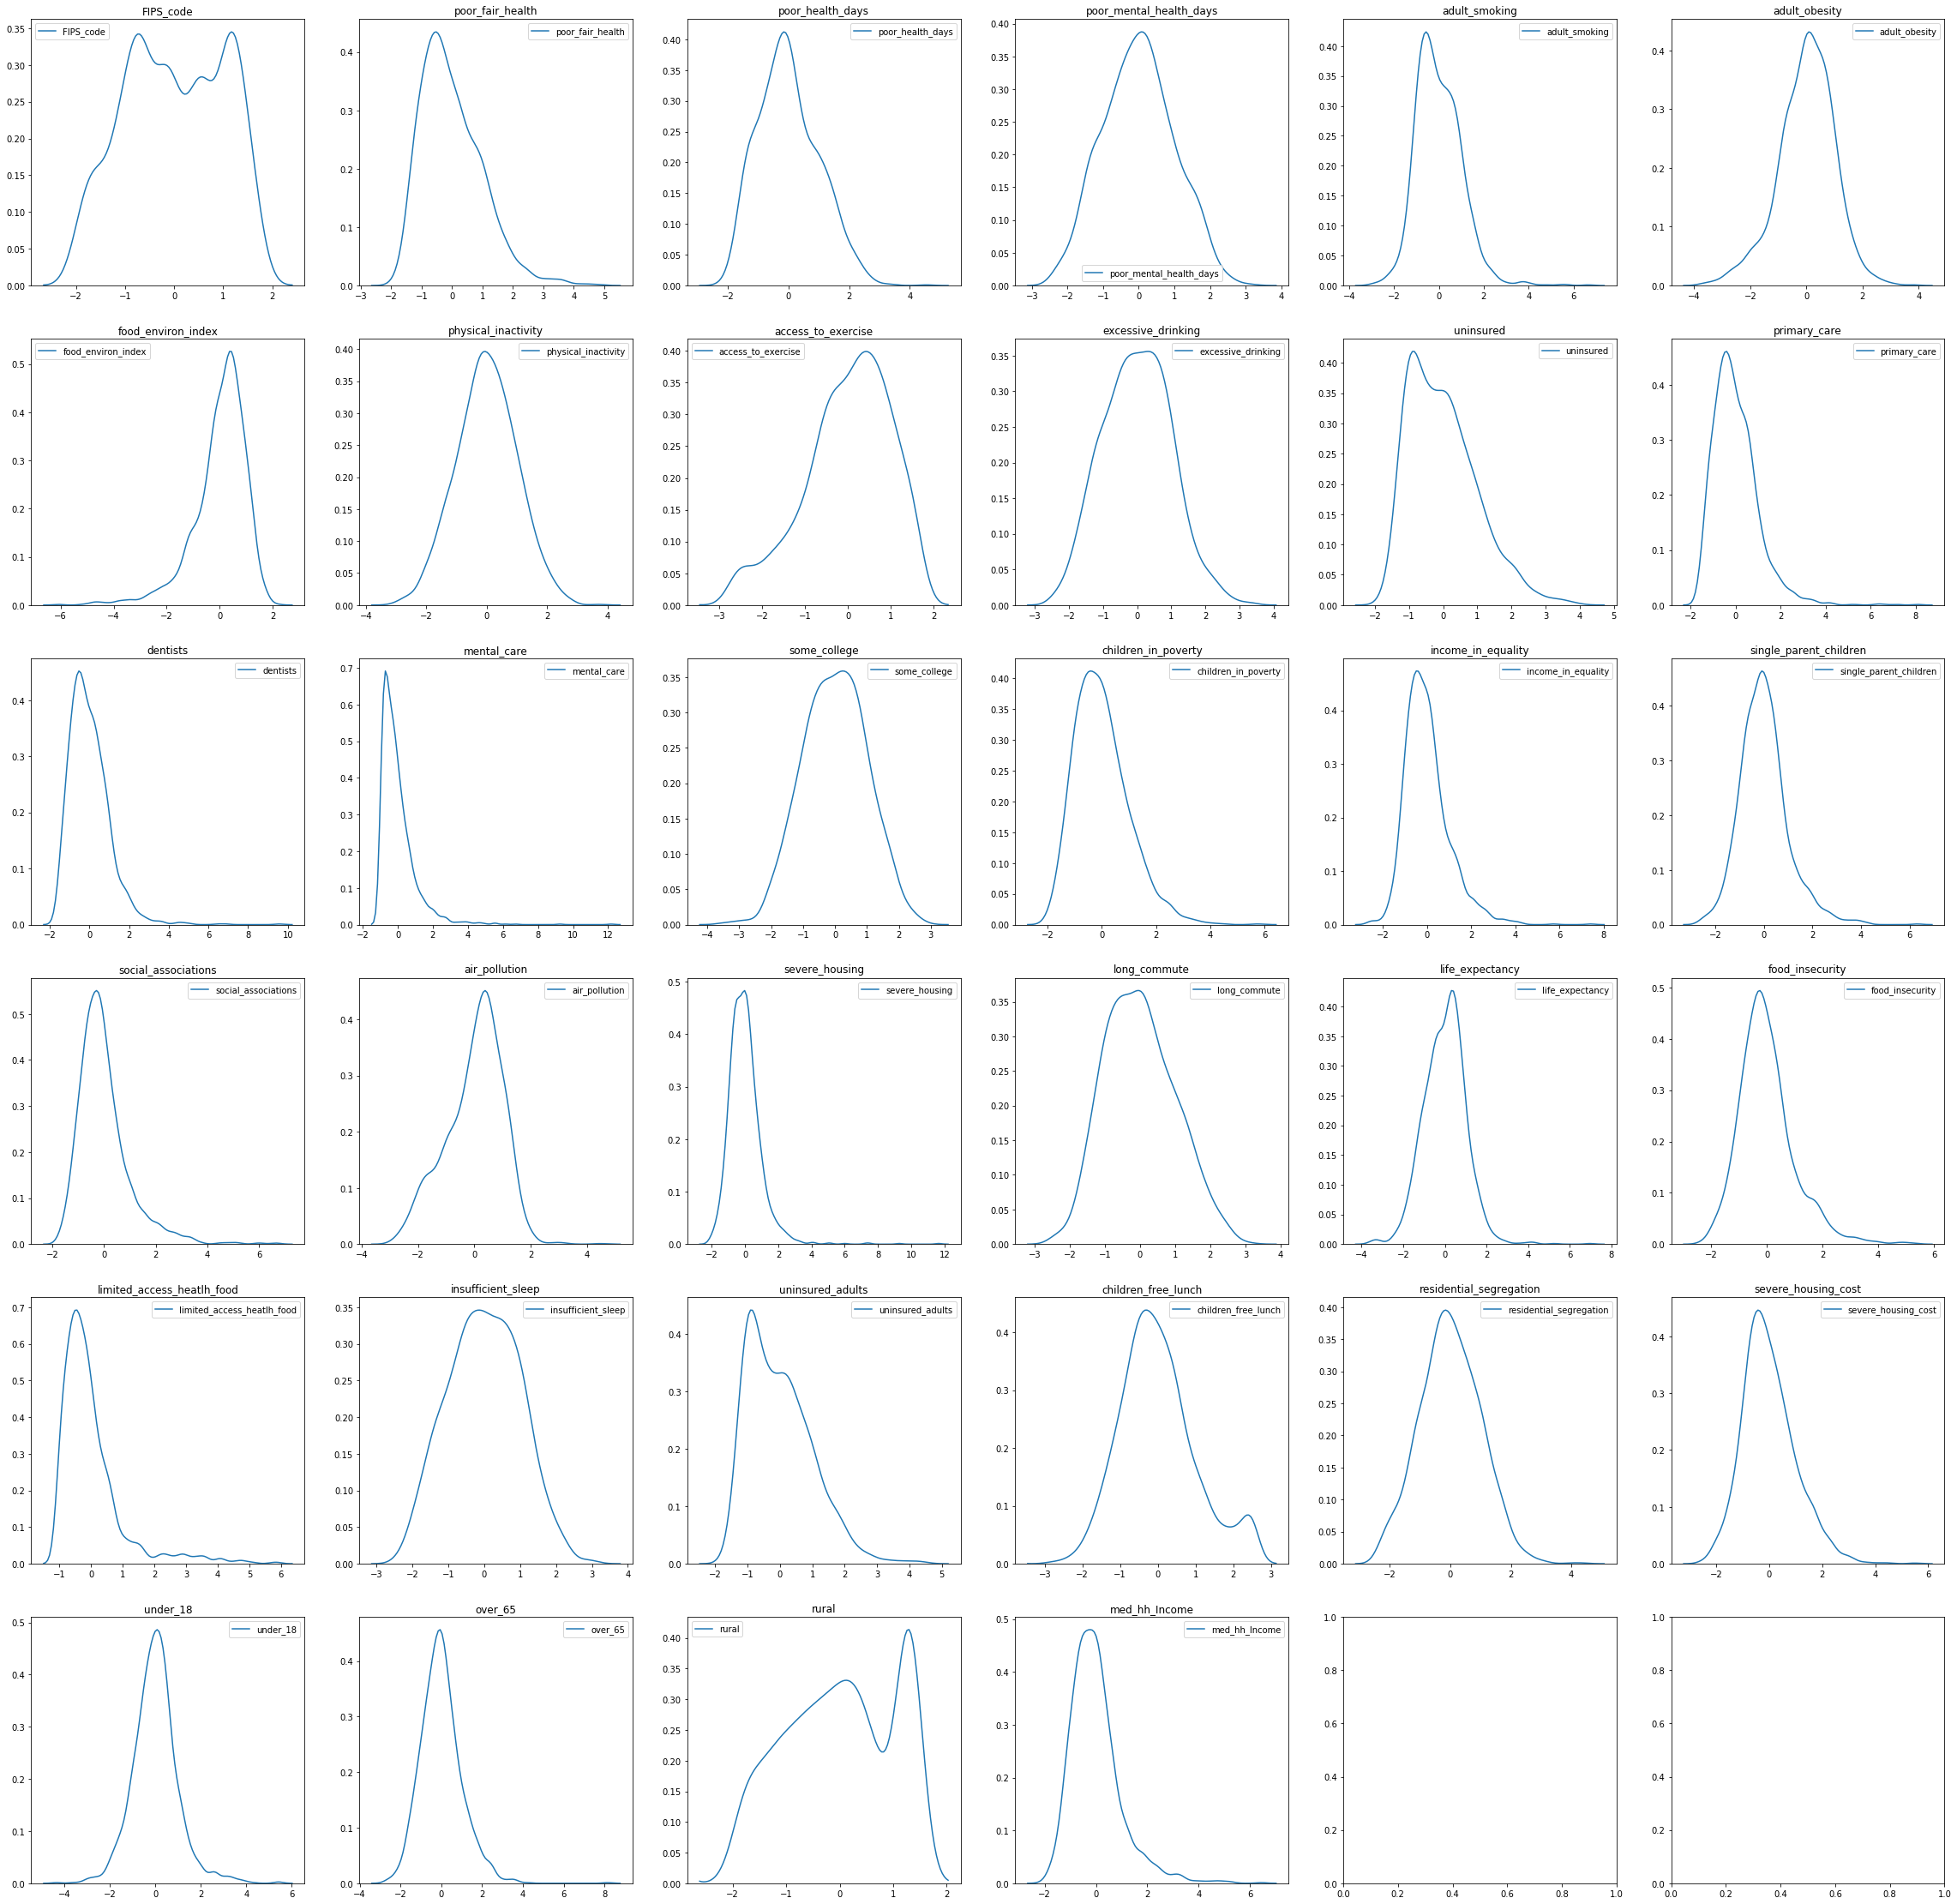

In [89]:
fig2, axes2 = plt.subplots(6, 6, figsize = (40,40))
print(axes2.shape)


for n in range(1,36):
    
    i = X_train_transformed.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    cross_val_score
    ax = axes2[row][col]
    sns.kdeplot(X_train_transformed[i], ax = ax)
    ax.set_title('{}'.format(i));

In [91]:
xy

FIPS_code  poor_fair_health  poor_health_days  poor_mental_health_days  \
2681   1.168281          0.501201         -0.226171                -0.655076   
2823   1.219159         -1.140443         -0.806113                -0.754072   
2576   1.154477          2.020238          0.805546                 0.038494   
1624  -0.062067          1.335360          1.429218                 1.699102   
1913   0.371319         -0.706992         -0.810259                -1.056857   
...         ...               ...               ...                      ...   
3019   1.484331         -1.367324         -0.414858                -0.574251   
1033  -0.618639          1.371932          1.601078                 1.396686   
1654  -0.026110         -1.356806         -1.351088                -1.613503   
1330  -0.282868         -0.335292          0.294945                 0.565334   
3053   1.549277          0.961630          1.686809                 1.826238   

      adult_smoking  adult_obesity  food_environ_index  physical_inactivity  \
2681      -0.606850       0.983061           -0.577468            -0.260713   
2823      -2.305657      -1.974435            0.369758            -1.370607   
2576      -0.102284      -0.616177            1.058650            -0.337257   
1624       1.811907       0.588728           -1.352472            -0.203304   
1913      -0.766678      -1.755361            1.661430            -0.279849   
...             ...            ...                 ...                  ...   
3019      -1.553869      -0.397104            0.283646            -2.002099   
1033       1.458665       2.407040            0.111423             2.705385   
1654      -0.986206      -2.215416            0.369758            -1.332335   
1330       0.067671      -0.178030            0.714204            -0.088487   
3053       0.883312       1.136413            0.197535             0.791774   

      access_to_exercise  excessive_drinking  uninsured  primary_care  \
2681            0.849840            0.776967   1.175129     -0.735569   
2823            0.622129           -1.485502   0.174535      0.631509   
2576            0.919086           -0.531825   3.093467     -0.457506   
1624            1.529605            1.023881   0.283101      0.937005   
1913            1.300293            0.651102  -1.050897      0.521382   
...                  ...                 ...        ...           ...   
3019            0.970085            0.340317  -0.986475      0.147690   
1033           -0.559197           -0.857192  -0.917356     -0.943925   
1654           -1.158236            0.835570   0.023208      0.967389   
1330           -1.054649            1.156156  -0.597922     -0.923041   
3053           -1.142002           -1.842266  -0.920725     -0.170911   

      dentists  mental_care  some_college  children_in_poverty  \
2681 -0.552090    -0.122689     -1.026216             0.159115   
2823  0.525867    -0.483465     -0.340521            -0.977918   
2576 -0.217964    -0.311425     -1.187445             0.505639   
1624  0.224524     1.150777      1.270025             1.187859   
1913  1.266235     0.665635      0.776710            -1.378586   
...        ...          ...           ...                  ...   
3019  1.037849     0.852265      1.303801            -1.172838   
1033 -0.692578     0.067351      0.002831             1.328635   
1654 -1.325965    -0.676486      0.783604            -0.880458   
1330 -0.707087    -0.058413     -0.306115             0.050826   
3053 -0.201282    -0.491191     -1.053181             0.007511   

      income_in_equality  single_parent_children  social_associations  \
2681           -0.317750                0.081388            -0.216558   
2823           -1.379666               -1.908601            -1.540310   
2576           -1.571598               -0.995763             0.426493   
1624            2.025090                2.600897             0.002625   
1913           -0.177641               -0.865850            -

(6, 6)


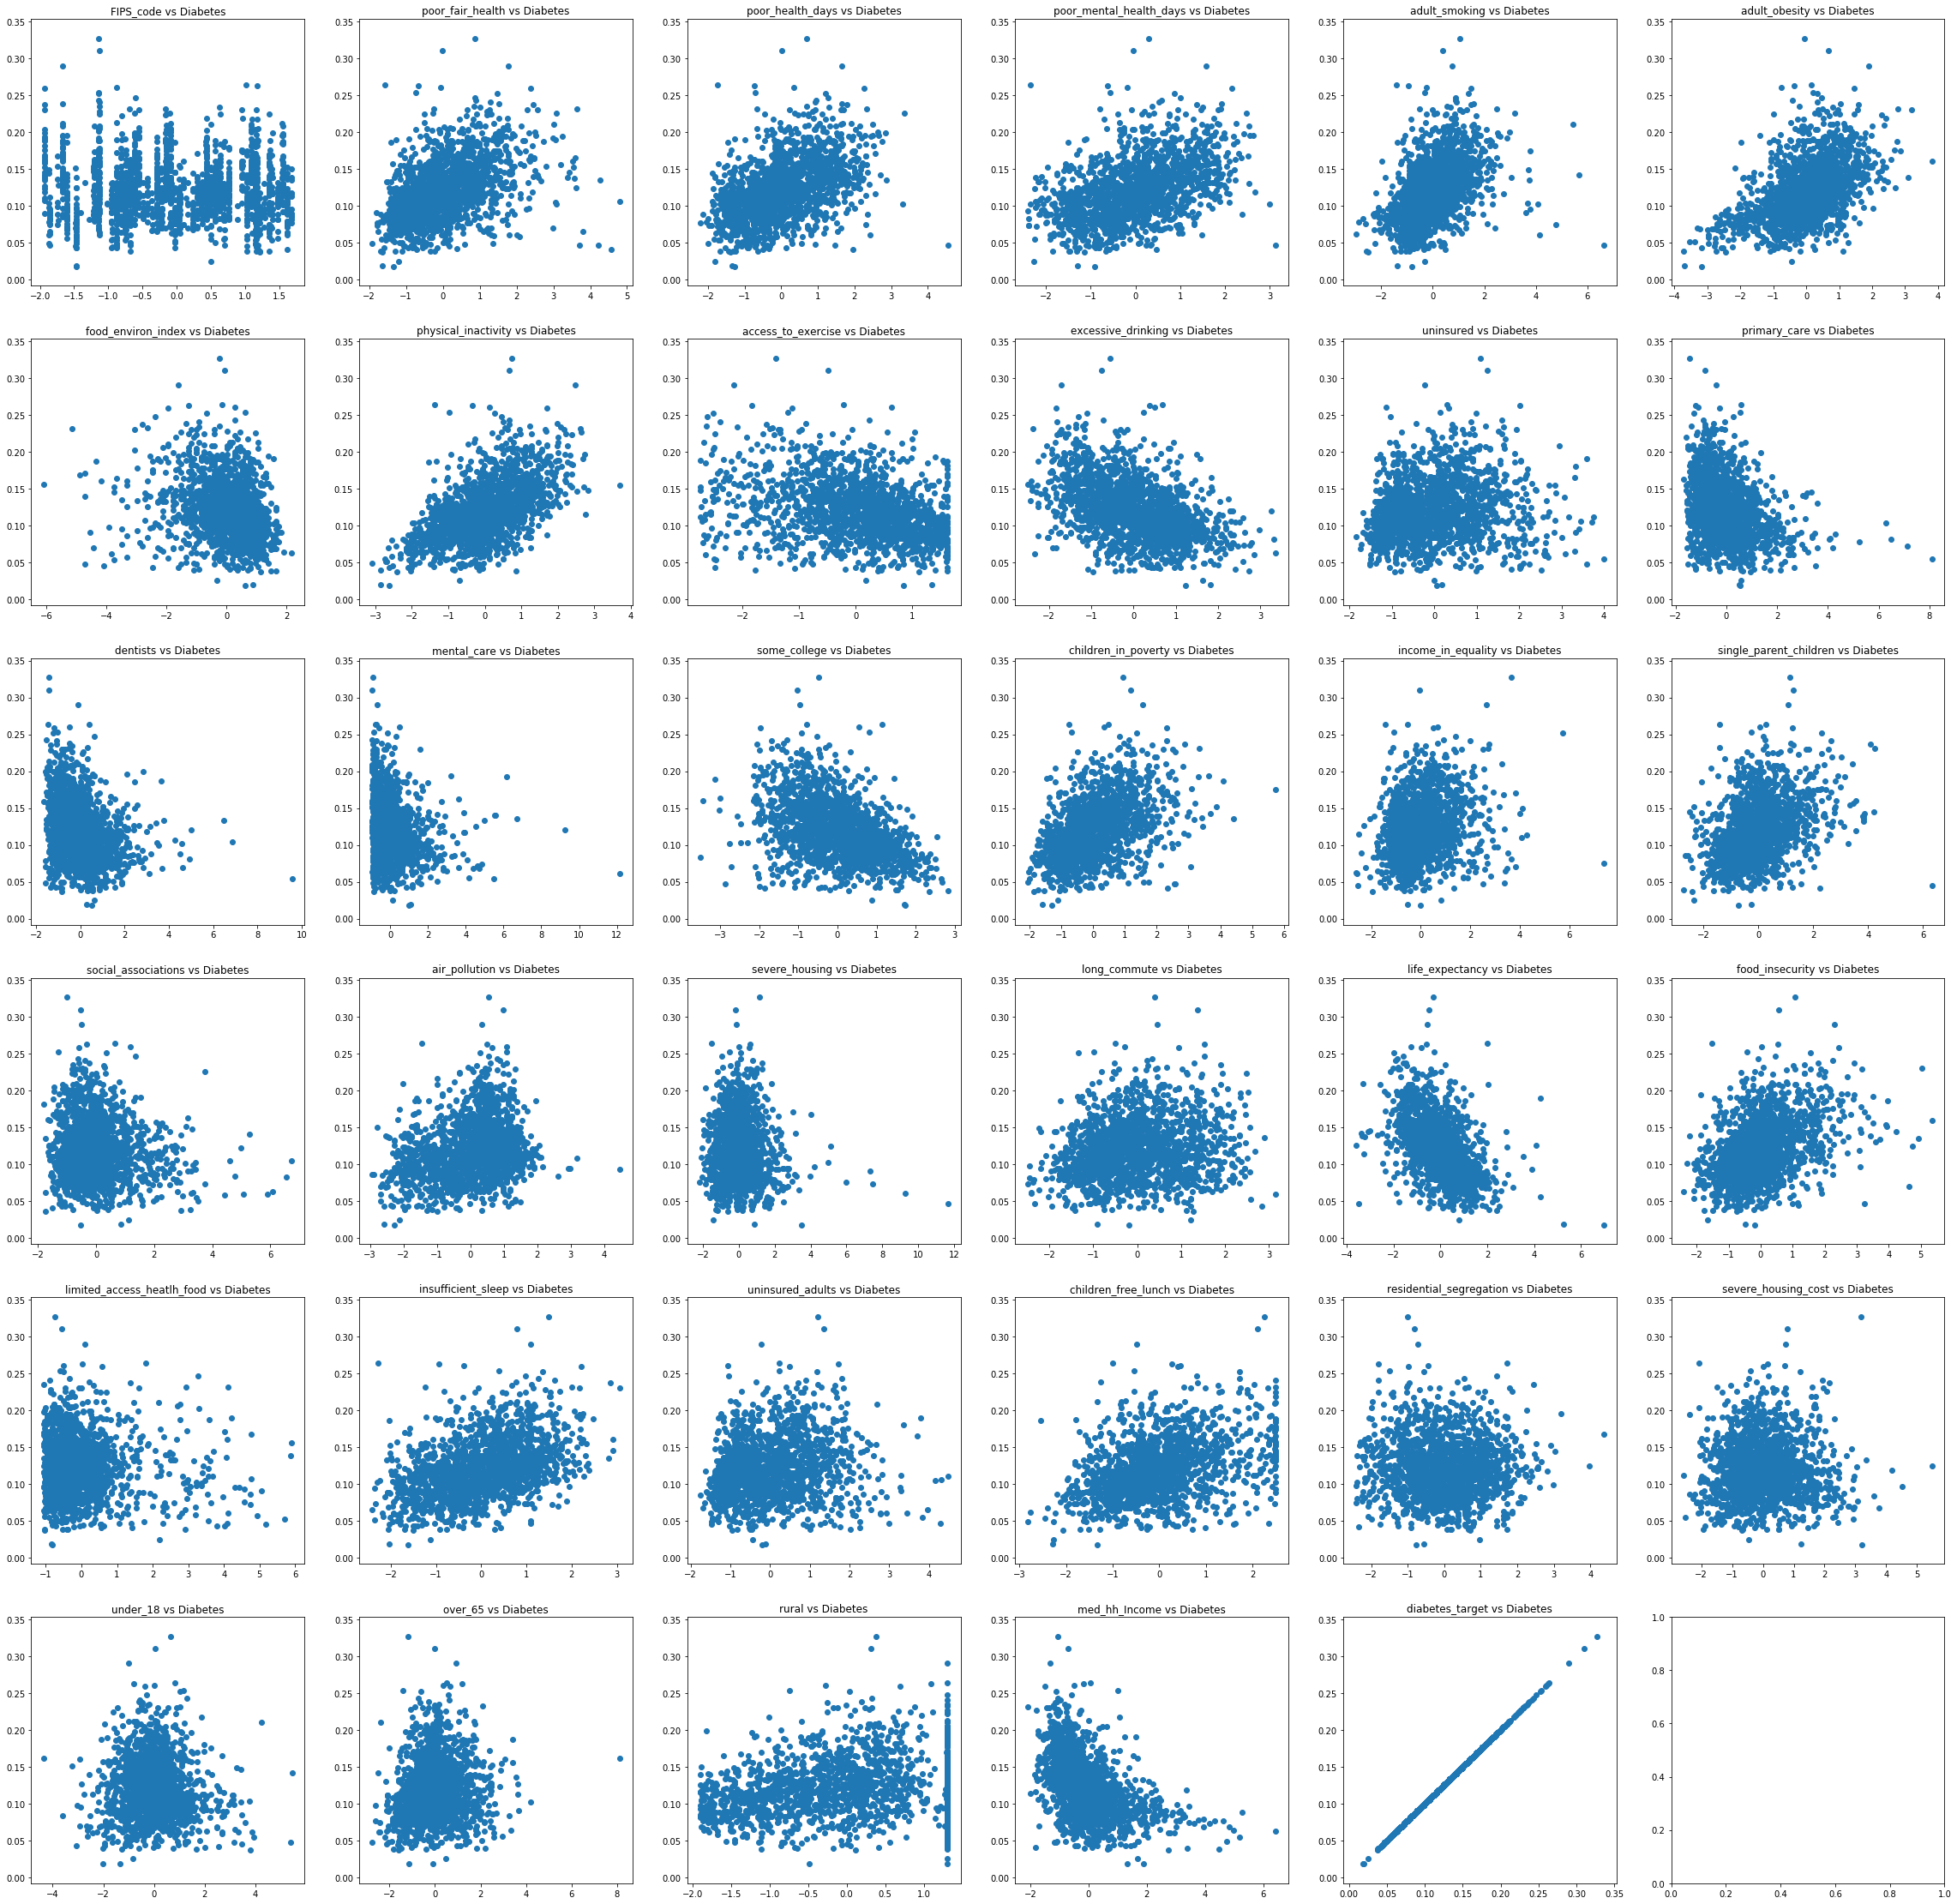

In [93]:
fig2, axes3 = plt.subplots(6, 6, figsize = (40,40))
print(axes3.shape)

xy = pd.concat([X_train_transformed, y_train], axis = 1)

for n in range(1,36):
    
    i = xy.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
        
    if len(xy[str(i)].unique()) > 12:
        
        ax = axes3[row][col]
        ax.scatter(xy[str(i)], xy['diabetes_target'])
        ax.set_title('{}'.format(i) + ' vs Diabetes')
            
        
    else:
        ax = axes3[row][col]
        sns.boxplot(str(i), 'diabetes_target', data=xy, ax=ax)
        ax.set_title('{}'.format(i) + ' vs Diabetes')
    

In [601]:
def mean_normalize(var):

    normalised_means = []
    
    mean_sample = sum(var)/len(var)
    
    for i in var:
        normalised_means.append(i - mean_sample)
        
    return normalised_means


In [604]:
m = mean_normalize(X_train_transformed['dentists'])

In [605]:
from sklearn.preprocessing import Normalizer

In [606]:
m = Normalizer().fit([X_train_transformed['dentists']])

In [607]:
n = m.transform([X_train_transformed['dentists']])

In [608]:
nn = [x for x in n[0]]

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


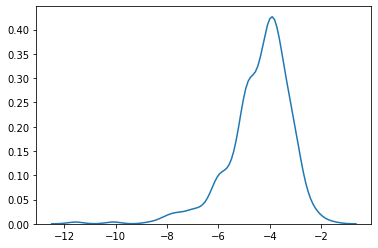

In [609]:
sns.kdeplot(np.log(nn))

In [611]:
from scipy.stats import normaltest

In [615]:
n_n = [x + 20 for x in nn]

In [617]:
normaltest(np.log(n_n))

NormaltestResult(statistic=703.7649289258492, pvalue=1.5114277972593056e-153)

In [506]:
normaltest(df_diabetes_3['some_college'])

NormaltestResult(statistic=15.578984233989152, pvalue=0.00041406312620998907)

In [510]:
df_diabetes_3['access_to_exercise'].describe()

count    3142.000000
mean        0.951179
std        17.830056
min         0.000501
25%         0.493489
50%         0.666775
75%         0.802572
max       999.990000
Name: access_to_exercise, dtype: float64

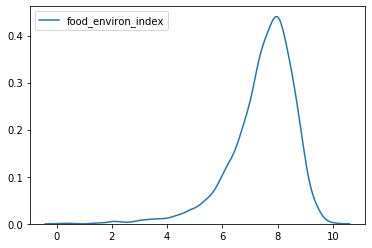

In [514]:
sns.kdeplot(df_diabetes_3[df_diabetes_3['food_environ_index'] != 999.99]['food_environ_index'])

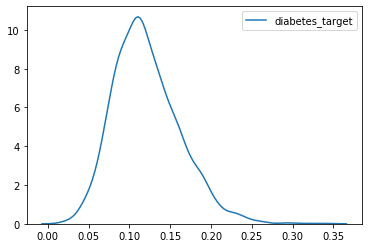

In [632]:
sns.kdeplot(target)

Outlier free dataset

In [624]:
X_train.columns

Index(['FIPS_code', 'poor_fair_health', 'poor_health_days',
       'poor_mental_health_days', 'adult_smoking', 'adult_obesity',
       'food_environ_index', 'physical_inactivity', 'access_to_exercise',
       'excessive_drinking', 'uninsured', 'primary_care', 'dentists',
       'mental_care', 'some_college', 'children_in_poverty',
       'income_in_equality', 'single_parent_children', 'social_associations',
       'air_pollution', 'severe_housing', 'long_commute', 'life_expectancy',
       'food_insecurity', 'limited_access_heatlh_food', 'insufficient_sleep',
       'uninsured_adults', 'children_free_lunch', 'residential_segregation',
       'severe_housing_cost', 'under_18', 'over_65', 'rural', 'med_hh_Income',
       'unemployment'],
      dtype='object')

In [626]:
b = X_train.loc[:,['poor_fair_health', 'poor_health_days',
       'poor_mental_health_days', 'adult_smoking', 'adult_obesity',
       'food_environ_index', 'physical_inactivity', 'access_to_exercise',
       'excessive_drinking', 'uninsured', 'primary_care', 'dentists',
       'mental_care', 'some_college', 'children_in_poverty',
       'income_in_equality', 'single_parent_children', 'social_associations',
        'severe_housing', 'long_commute', 'life_expectancy',
       'food_insecurity', 'limited_access_heatlh_food', 'insufficient_sleep',
       'uninsured_adults', 'residential_segregation',
       'severe_housing_cost', 'under_18', 'over_65', 'rural', 'med_hh_Income',
       'unemployment']]

In [629]:
from scipy import stats


b[(np.abs(stats.zscore(b)) < 3).all(axis=1)]

poor_fair_health  poor_health_days  poor_mental_health_days  \
2681          0.199801          3.767979                 3.541069   
2823          0.120618          3.347285                 3.480012   
2576          0.273071          4.516392                 3.968838   
1624          0.240037          4.968806                 4.993041   
1913          0.141525          3.344278                 3.293265   
...                ...               ...                      ...   
3019          0.109675          3.631104                 3.590919   
1033          0.241801          5.093475                 4.806522   
1654          0.110182          2.951958                 2.949946   
1330          0.159454          4.145999                 4.293774   
3053          0.222010          5.155664                 5.071454   

      adult_smoking  adult_obesity  food_environ_index  physical_inactivity  \
2681       0.156364          0.366                 6.8                0.244   
2823       0.092803          0.231                 7.9                0.186   
2576       0.175243          0.293                 8.7                0.240   
1624       0.246863          0.348                 5.9                0.247   
1913       0.150384          0.241                 9.4                0.243   
...             ...            ...                 ...                  ...   
3019       0.120931          0.303                 7.8                0.153   
1033       0.233646          0.431                 7.6                0.399   
1654       0.142171          0.220                 7.9                0.188   
1330       0.181602          0.313                 8.3                0.253   
3053       0.212119          0.373                 7.7                0.299   

      access_to_exercise  excessive_drinking  uninsured  primary_care  \
2681            0.823632            0.198311   0.169583      0.000327   
2823            0.771459            0.125355   0.120235      0.000774   
2576            0.839498            0.156108   0.264195      0.000418   
1624            0.979380            0.206273   0.125589      0.000873   
1913            0.926840            0.194252   0.059797      0.000738   
...                  ...                 ...        ...           ...   
3019            0.851182            0.184231   0.062974      0.000616   
1033            0.500794            0.145616   0.066383      0.000259   
1654            0.363542            0.200201   0.112771      0.000883   
1330            0.387276            0.210538   0.082137      0.000266   
3053            0.367261            0.113851   0.066217      0.000511   

      dentists  mental_care  some_college  children_in_poverty  \
2681  0.000333     0.001332      0.456061                0.231   
2823  0.000626     0.000783      0.535286                0.126   
2576  0.000424     0.001045      0.437433                0.263   
1624  0.000544     0.003269      0.721368                0.326   
1913  0.000828     0.002531      0.664371                0.089   
...        ...          ...           ...                  ...   
3019  0.000766     0.002815      0.725270                0.108   
1033  0.000295     0.001621      0.574957                0.339   
1654  0.000122     0.000489      0.665167                0.135   
1330  0.000291     0.001430      0.539262                0.221   
3053  0.000428     0.000771      0.452946                0.217   

      income_in_equality  single_parent_children  social_associations  \
2681            4.289289                0.333375             0.122589   
2823            3.489959                0.120740             0.030945   
2576            3.345487                0.218279             0.167108   
1624            6.052801                0.602591             0.137763   
1913            4.394752                0.232160             0.065658   
...                  ...                     ...                  ...   
3019            4.014222                0.26568

In [628]:
b

poor_fair_health  poor_health_days  poor_mental_health_days  \
2681          0.199801          3.767979                 3.541069   
2823          0.120618          3.347285                 3.480012   
2576          0.273071          4.516392                 3.968838   
1624          0.240037          4.968806                 4.993041   
1913          0.141525          3.344278                 3.293265   
...                ...               ...                      ...   
3019          0.109675          3.631104                 3.590919   
1033          0.241801          5.093475                 4.806522   
1654          0.110182          2.951958                 2.949946   
1330          0.159454          4.145999                 4.293774   
3053          0.222010          5.155664                 5.071454   

      adult_smoking  adult_obesity  food_environ_index  physical_inactivity  \
2681       0.156364          0.366                 6.8                0.244   
2823       0.092803          0.231                 7.9                0.186   
2576       0.175243          0.293                 8.7                0.240   
1624       0.246863          0.348                 5.9                0.247   
1913       0.150384          0.241                 9.4                0.243   
...             ...            ...                 ...                  ...   
3019       0.120931          0.303                 7.8                0.153   
1033       0.233646          0.431                 7.6                0.399   
1654       0.142171          0.220                 7.9                0.188   
1330       0.181602          0.313                 8.3                0.253   
3053       0.212119          0.373                 7.7                0.299   

      access_to_exercise  excessive_drinking  uninsured  primary_care  \
2681            0.823632            0.198311   0.169583      0.000327   
2823            0.771459            0.125355   0.120235      0.000774   
2576            0.839498            0.156108   0.264195      0.000418   
1624            0.979380            0.206273   0.125589      0.000873   
1913            0.926840            0.194252   0.059797      0.000738   
...                  ...                 ...        ...           ...   
3019            0.851182            0.184231   0.062974      0.000616   
1033            0.500794            0.145616   0.066383      0.000259   
1654            0.363542            0.200201   0.112771      0.000883   
1330            0.387276            0.210538   0.082137      0.000266   
3053            0.367261            0.113851   0.066217      0.000511   

      dentists  mental_care  some_college  children_in_poverty  \
2681  0.000333     0.001332      0.456061                0.231   
2823  0.000626     0.000783      0.535286                0.126   
2576  0.000424     0.001045      0.437433                0.263   
1624  0.000544     0.003269      0.721368                0.326   
1913  0.000828     0.002531      0.664371                0.089   
...        ...          ...           ...                  ...   
3019  0.000766     0.002815      0.725270                0.108   
1033  0.000295     0.001621      0.574957                0.339   
1654  0.000122     0.000489      0.665167                0.135   
1330  0.000291     0.001430      0.539262                0.221   
3053  0.000428     0.000771      0.452946                0.217   

      income_in_equality  single_parent_children  social_associations  \
2681            4.289289                0.333375             0.122589   
2823            3.489959                0.120740             0.030945   
2576            3.345487                0.218279             0.167108   
1624            6.052801                0.602591             0.137763   
1913            4.394752                0.232160             0.065658   
...                  ...                     ...                  ...   
3019            4.014222                0.26568